In [1]:
import shapely

**object.minimum_clearance**

Returns the smallest distance by which a node could be moved to produce an invalid geometry.

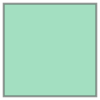

In [2]:
poly = shapely.Polygon([
    [0, 0], [1, 0], [1, 1], [0, 1], [0, 0]
])
poly

In [3]:
poly.minimum_clearance

1.0

**object.geom_type**

Returns a string specifying the Geometry Type of the object in accordance with

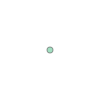

In [4]:
point = shapely.Point(0, 0)
point

In [5]:
point.geom_type

'Point'

**object.distance(other)**

Returns the minimum distance (`float`) to the other geometric object.

In [6]:
shapely.Point(0, 0).distance(shapely.Point(1, 1))

1.4142135623730951

**object.hausdorff_distance(other)**

Returns the Hausdorff distance (`float`) to the other geometric object. The Hausdorff distance between two geometries is the furthest distance that a point on either geometry can be from the nearest point to it on the other geometry.

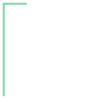

In [7]:
point = shapely.Point(1, 1)
line = shapely.LineString([(2, 0), (2, 4), (3, 4)])
line

In [8]:
point.hausdorff_distance(line), point.distance(line)

(3.605551275463989, 1.0)

**object.representative_point()**

Returns a cheaply computed point that is guaranteed to be within the geometric object.

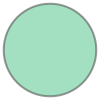

In [9]:
donut = shapely.Point(0, 0).buffer(2.0)
donut

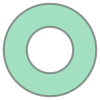

In [10]:
donut = shapely.Point(0, 0).buffer(2.0).difference(shapely.Point(0, 0).buffer(1.0))
donut

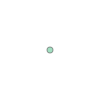

In [15]:
donut.centroid  # (0, 0)

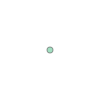

In [16]:
donut.representative_point()    # (1.498, 0.049)

### Points

*class* **Point**(*coordinates*)

>The Point constructor takes positional coordinate values or point tuple parameters.

In [17]:
from shapely import Point

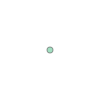

In [18]:
point = Point(0.0, 0.0)
point

In [19]:
# A Point has zero area and zero length.
point.area, point.length

(0.0, 0.0)

In [20]:
# Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.
point.bounds

(0.0, 0.0, 0.0, 0.0)

In [21]:
# Coordinate values are accessed via coords, x, y, and z properties.
list(point.coords)

[(0.0, 0.0)]

In [22]:
point.x

0.0

In [23]:
point.y

0.0

In [24]:
# Coordinates may also be sliced. New in version 1.2.14.
point.coords[:]

[(0.0, 0.0)]

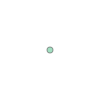

In [25]:
# The Point constructor also accepts another Point instance, thereby making a copy.
Point(point)

### LineStrings

*class* **LineString**(*coordinates*)

The LineString constructor takes an ordered sequence of 2 or more `(x, y[, z])` point tuples.

In [26]:
from shapely import LineString

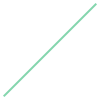

In [27]:
line = LineString([(0, 0), (1, 1)])
line

In [28]:
line.area

0.0

In [29]:
line.length

1.4142135623730951

In [30]:
line.bounds

(0.0, 0.0, 1.0, 1.0)

In [31]:
len(line.coords), list(line.coords)

(2, [(0.0, 0.0), (1.0, 1.0)])

In [32]:
line.coords[:]

[(0.0, 0.0), (1.0, 1.0)]

In [33]:
line.coords[1:]

[(1.0, 1.0)]

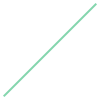

In [34]:
LineString(line)

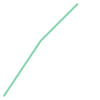

In [35]:
line = LineString([Point(0, 0), (2.0, 3.0), Point(4.0, 5.0)])
line

In [36]:
line.coords[:]

[(0.0, 0.0), (2.0, 3.0), (4.0, 5.0)]

### LinearRings

*class* **LinearRing**(*coordinates*)

The LinearRing constructor takes an ordered sequence of (`x, y[, z]`) point tuples.

In [37]:
from shapely import LinearRing

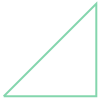

In [38]:
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
ring

In [39]:
ring.area, ring.length

(0.0, 3.414213562373095)

In [40]:
ring.bounds

(0.0, 0.0, 1.0, 1.0)

In [41]:
ring.coords[:]

[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

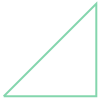

In [42]:
LinearRing(ring)

### Polygons

*class* **Polygon**(*shell[, holes=None]*)

The Polygon constructor takes two positional parameters. The first is an ordered sequence of (`x, y[, z]`) point tuples and is treated exactly as in the LinearRing case. The second is an optional unordered sequence of ring-like sequences specifying the interior boundaries or “holes” of the feature.

In [43]:
from shapely import Polygon

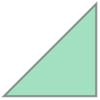

In [44]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon

In [45]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)

In [46]:
polygon.area, polygon.length

(0.5, 3.414213562373095)

In [47]:
polygon.exterior.coords[:]

[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [48]:
polygon.interiors[:]

[]

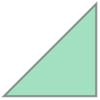

In [49]:
coords = [(0, 0), (1, 1), (1, 0)]
r = LinearRing(coords)
s = Polygon(r)
s

In [50]:
s.area

0.5

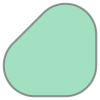

In [51]:
s.buffer(1.0)

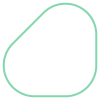

In [52]:
s.buffer(1.0).exterior

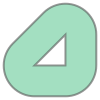

In [53]:
t = Polygon(s.buffer(1.0).exterior, [r])
t

In [54]:
t.area

6.5507620529190325

In [55]:
s.buffer(1.0).area

7.0507620529190325

In [56]:
s.area

0.5

In [57]:
s.buffer(1.0).area - s.area == t.area

True

#### shapely.geometry.box(minx, miny, maxx, maxy, ccw=True)

Makes a rectangular polygon from the provided bounding box values, with counter-clockwise order by default.

In [58]:
from shapely import box

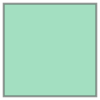

In [59]:
b = box(0.0, 0.0, 1.0, 1.0)
b

In [60]:
b.exterior.coords[:]

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

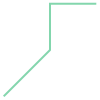

In [61]:
a = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
b = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])
a

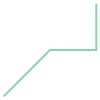

In [62]:
b

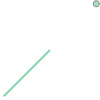

In [63]:
x = a.intersection(b)
x

In [64]:
list(x.geoms)

[<LINESTRING (0 0, 1 1)>, <POINT (2 2)>]

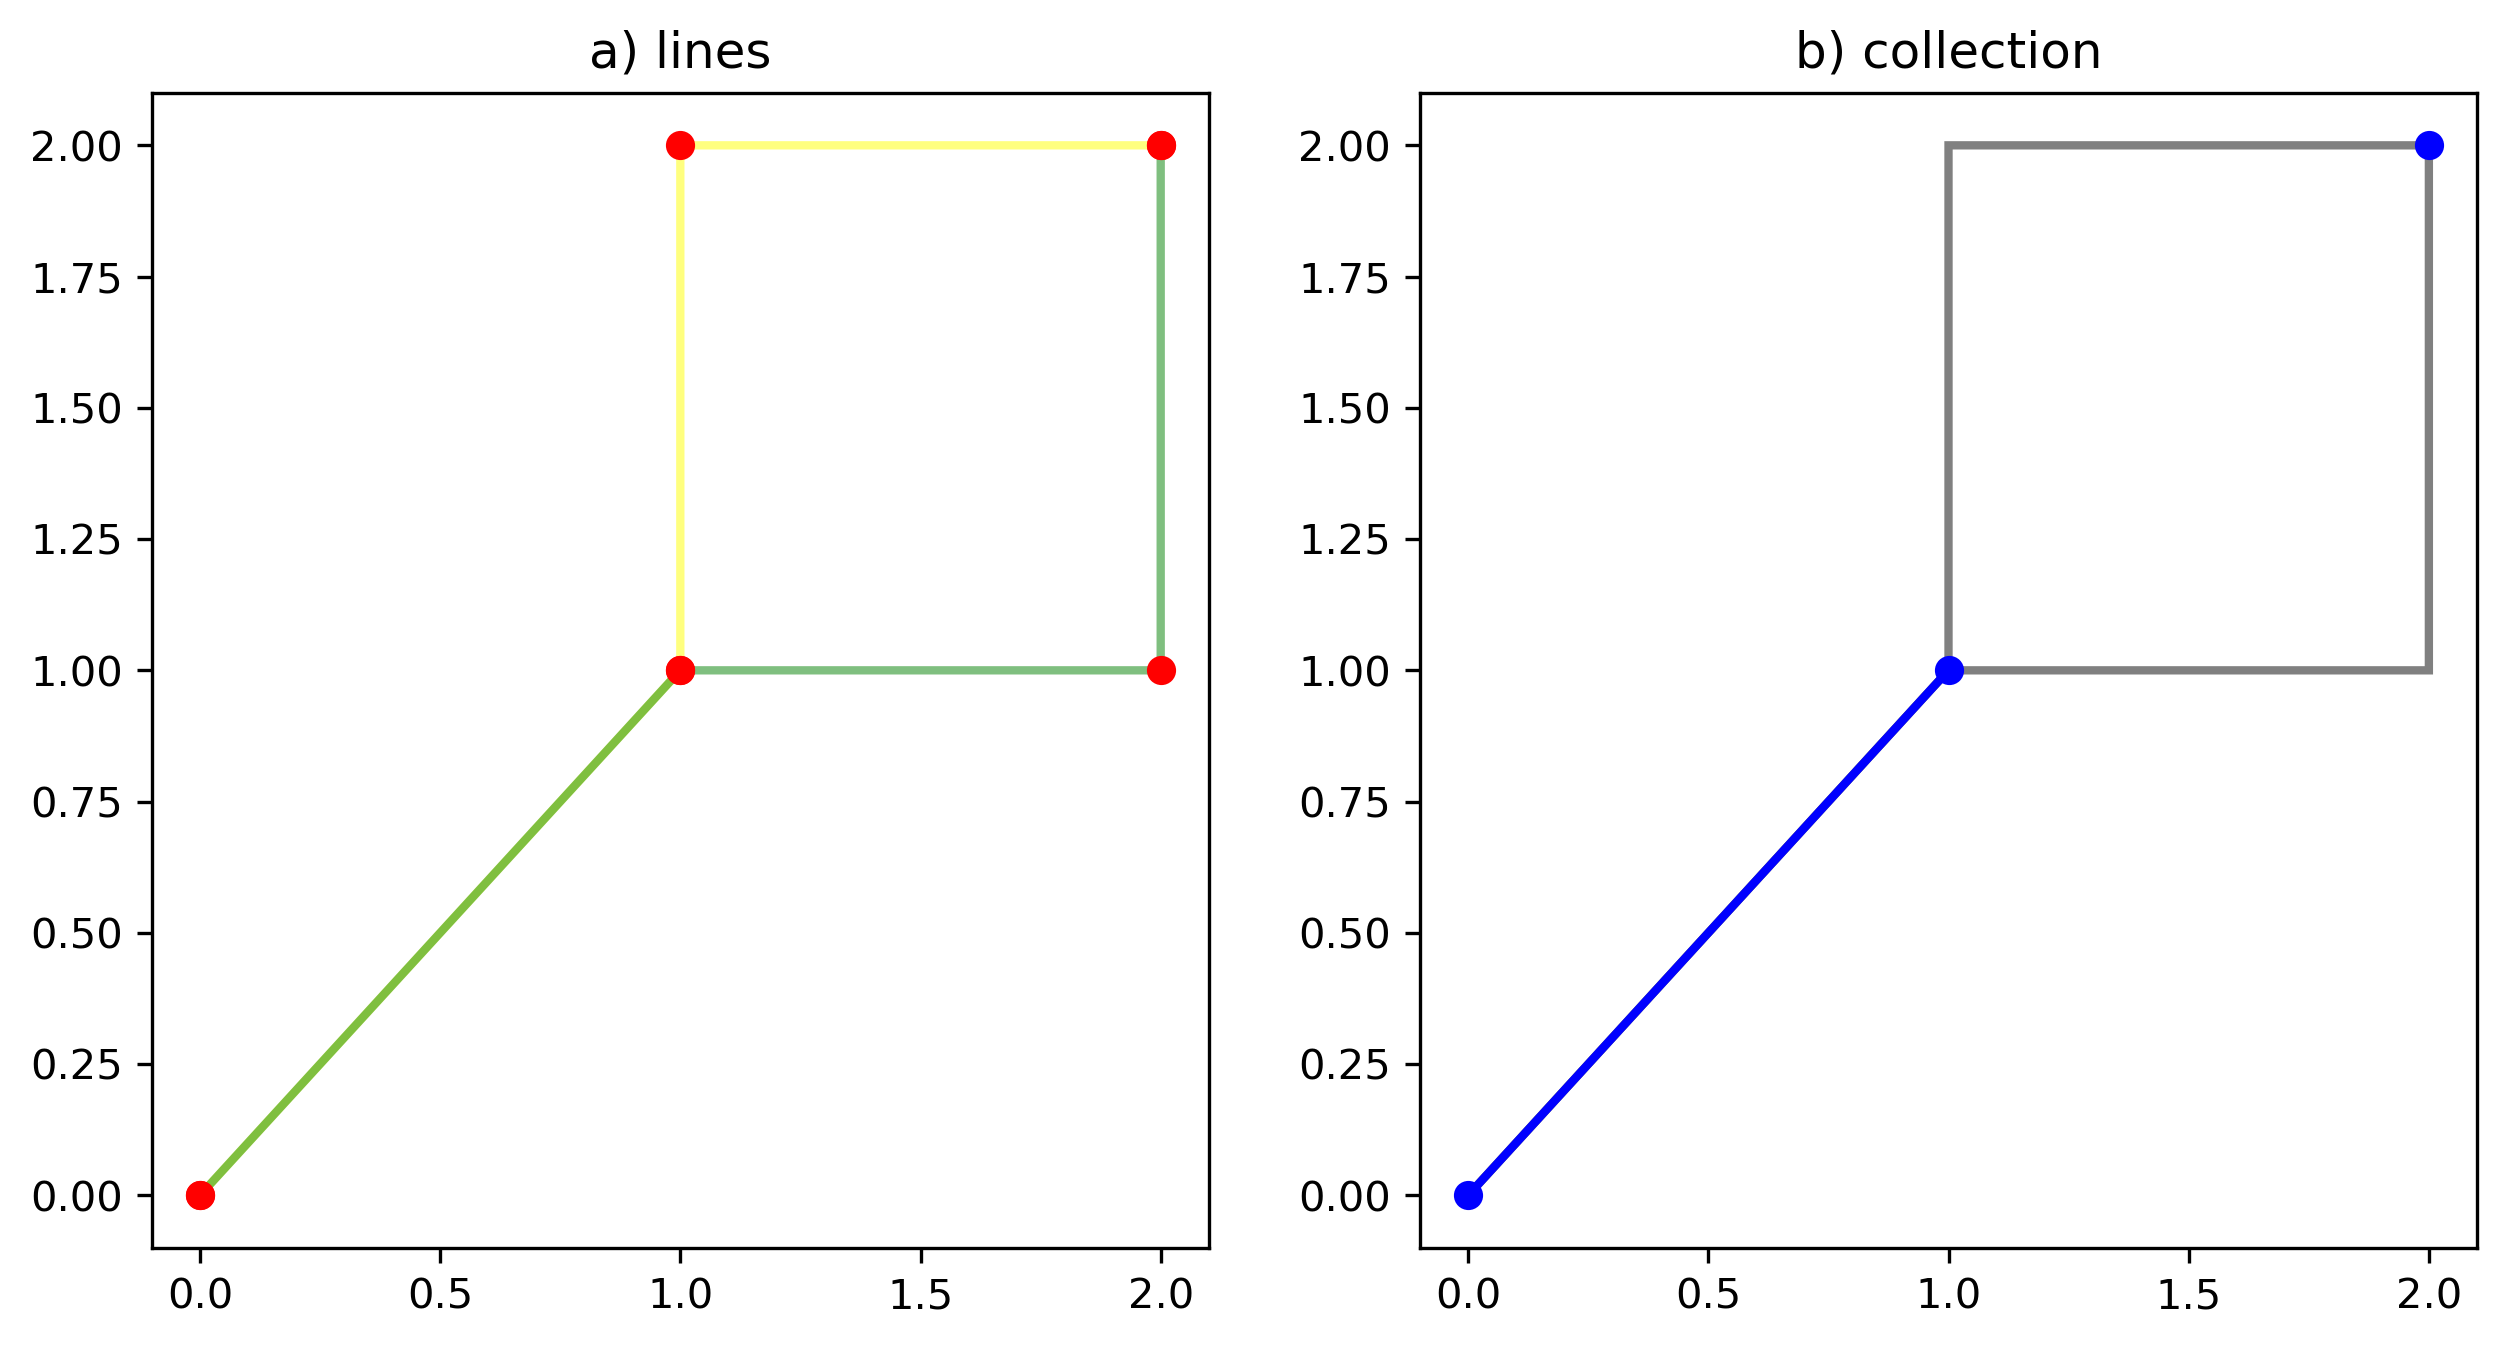

In [65]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from shapely.plotting import plot_line, plot_points

BLUE = 'blue'
GRAY = 'gray'
YELLOW = 'yellow'
GREEN = 'green'
RED = 'red'
SIZE = (10, 5)

fig = plt.figure(1, figsize=SIZE, dpi=300)

a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])

# 1: disconnected multilinestring
ax = fig.add_subplot(121)

plot_line(a, ax, add_points=False, color=YELLOW, alpha=0.5)
plot_line(b, ax, add_points=False, color=GREEN, alpha=0.5)
plot_points(a, ax=ax, color=RED)
plot_points(b, ax=ax, color=RED)

ax.set_title('a) lines')

#2: invalid self-touching ring
ax = fig.add_subplot(122)

x = a.intersection(b)

plot_line(a, ax=ax, color=GRAY, add_points=False)
plot_line(b, ax=ax, color=GRAY, add_points=False)

plot_line(x.geoms[0], ax=ax, color=BLUE)
plot_points(x.geoms[1], ax=ax, color=BLUE)

ax.set_title('b) collection')

plt.show()

#### Collections of Points

*class* **MultiPoint**(*points*)

The MultiPoint constructor takes a sequence of (`x, y[, z ]`) point tuples.

In [66]:
from shapely import MultiPoint

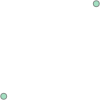

In [67]:
points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])
points

In [68]:
points.area, points.length

(0.0, 0.0)

In [69]:
points.bounds

(0.0, 0.0, 1.0, 1.0)

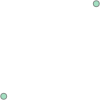

In [70]:
MultiPoint([Point(0, 0), Point(1, 1)])

#### Collections of Lines

*class* **MultiLineString**(*lines*)

The MultiLineString constructor takes a sequence of line-like sequences or objects.

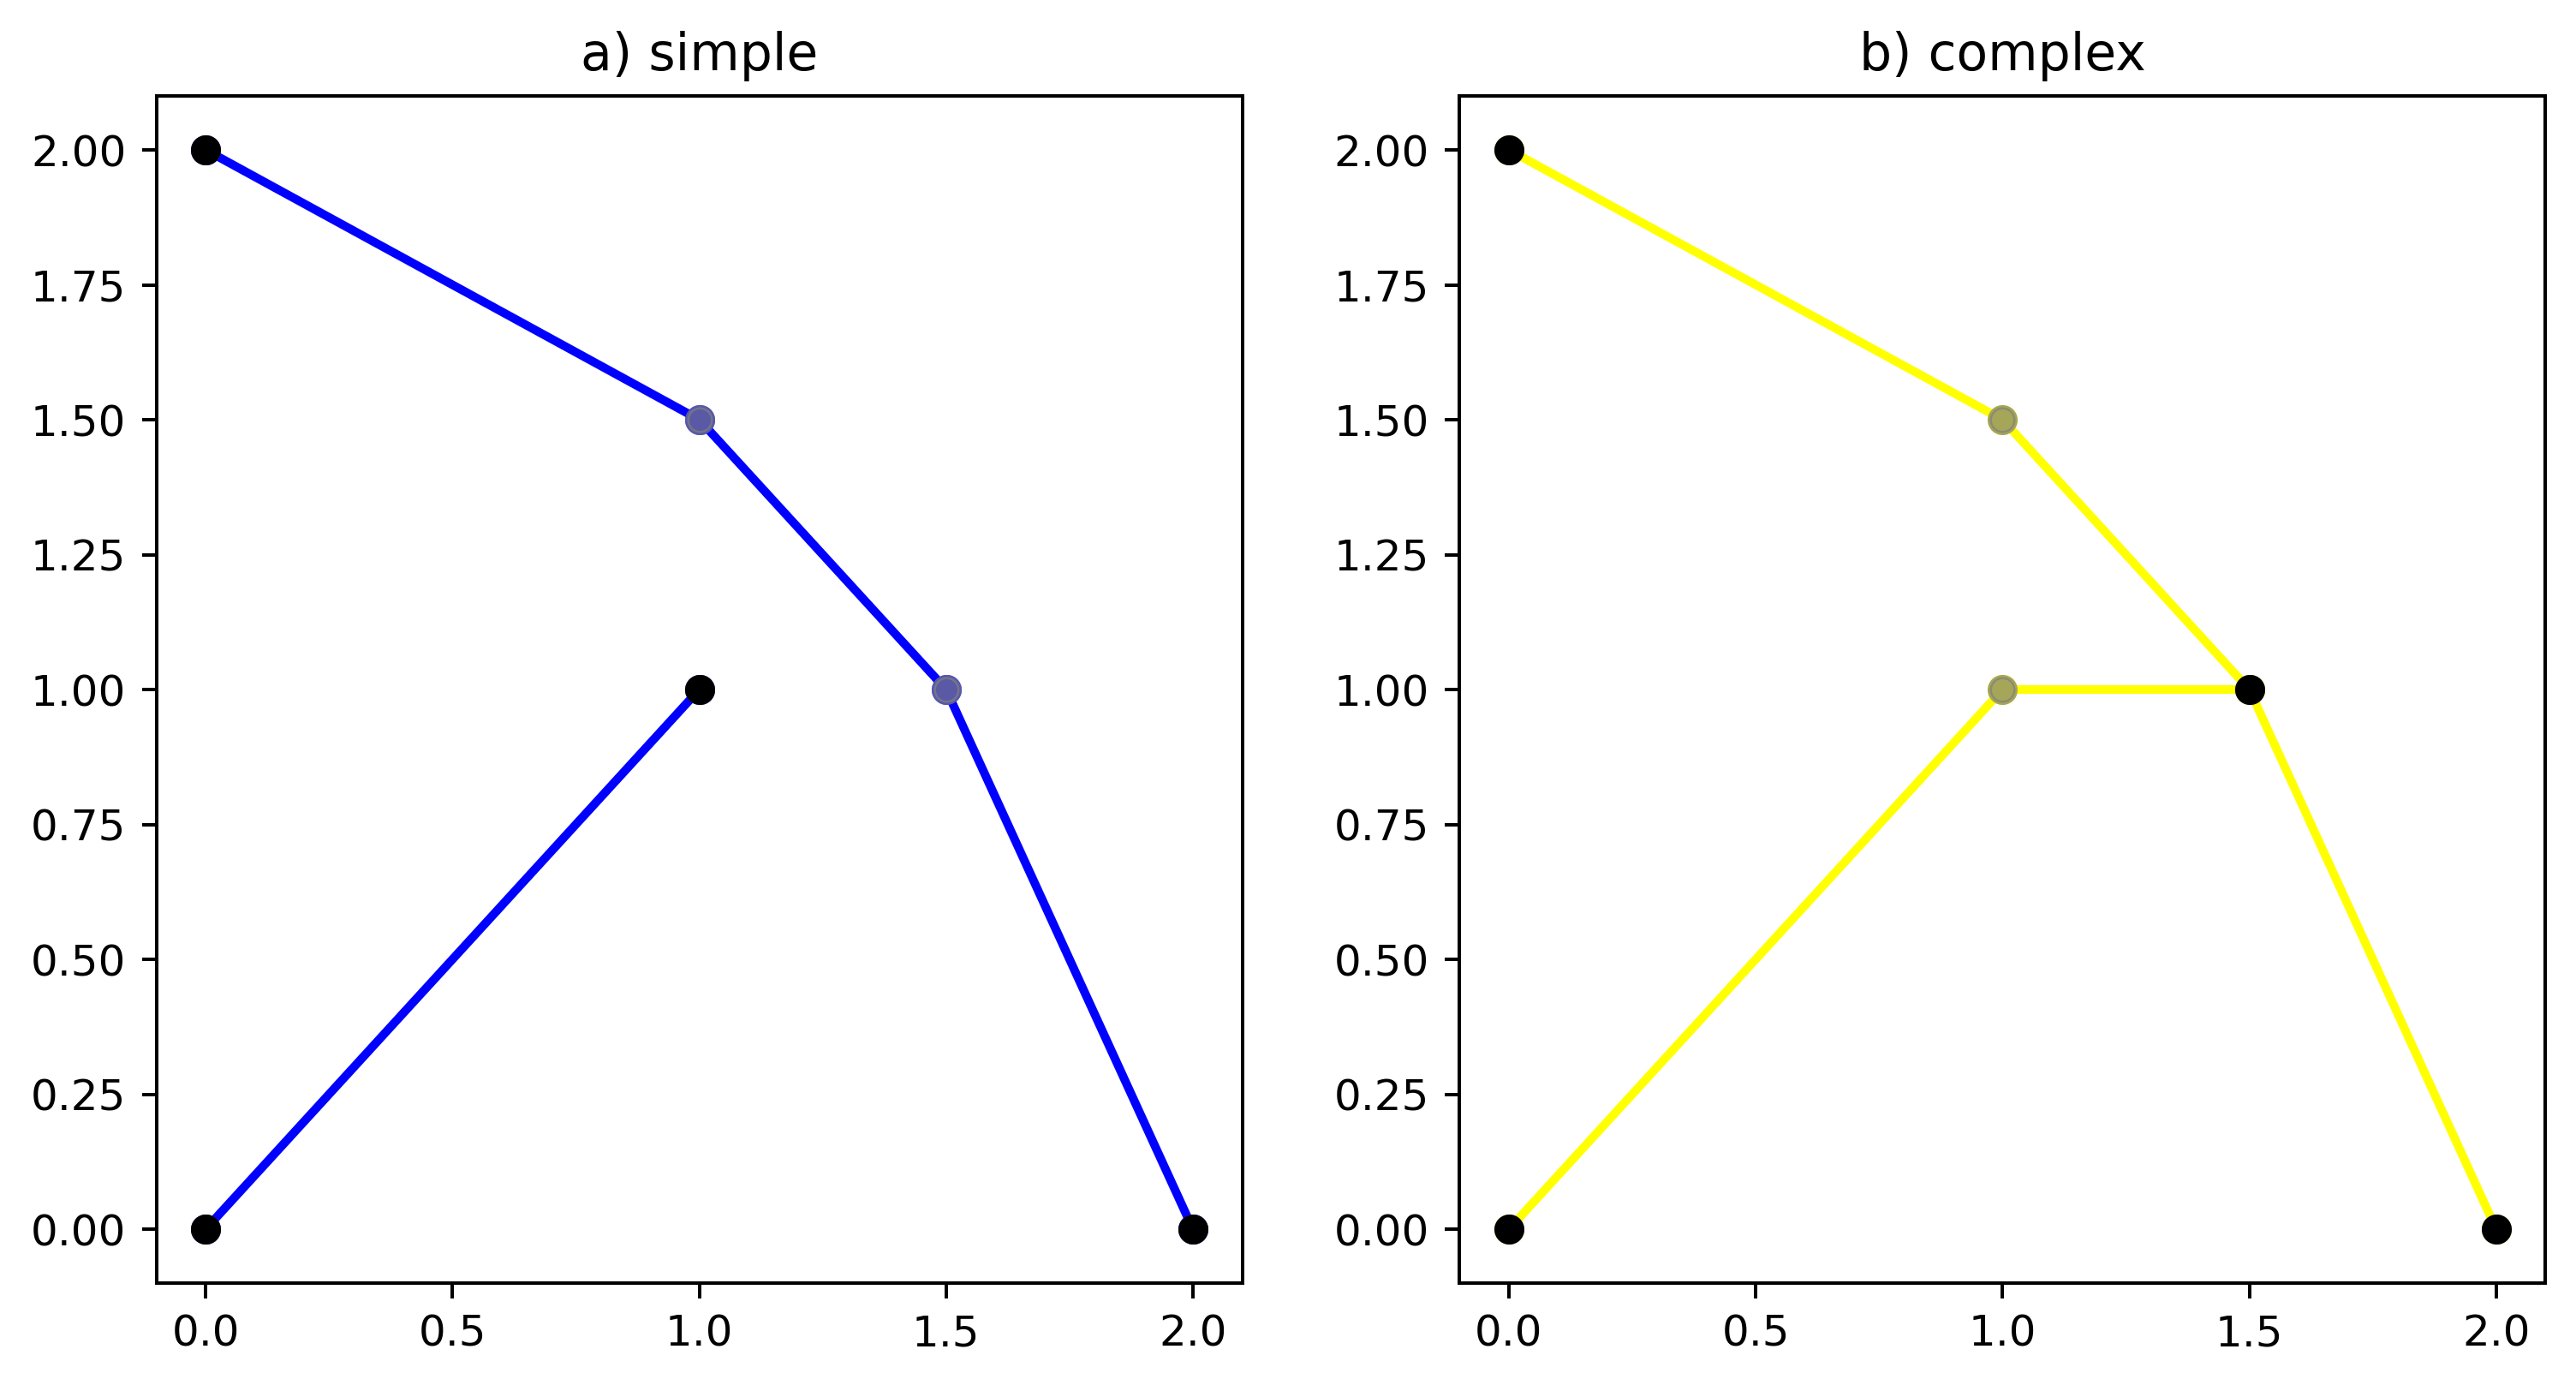

In [71]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiLineString
from shapely.plotting import plot_line, plot_points


fig = plt.figure(1, figsize=(10, 5), dpi=360)

# 1: disconnected multilinestring
ax = fig.add_subplot(121)

mline1 = MultiLineString([((0, 0), (1, 1)), ((0, 2),  (1, 1.5), (1.5, 1), (2, 0))])

plot_line(mline1, ax=ax, color='blue')
plot_points(mline1, ax=ax, color='gray', alpha=0.7)
plot_points(mline1.boundary, ax=ax, color='black')

ax.set_title('a) simple')


#2: invalid self-touching ring
ax = fig.add_subplot(122)

mline2 = MultiLineString([((0, 0), (1, 1), (1.5, 1)), ((0, 2), (1, 1.5), (1.5, 1), (2, 0))])

plot_line(mline2, ax=ax, color=YELLOW)
plot_points(mline2, ax=ax, color=GRAY, alpha=0.7)
plot_points(mline2.boundary, ax=ax, color='black')

ax.set_title('b) complex')

plt.show()


In [72]:
from shapely import MultiLineString

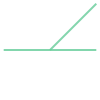

In [73]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

In [74]:
lines.area, lines.length

(0.0, 3.414213562373095)

In [75]:
lines.bounds

(-1.0, 0.0, 1.0, 1.0)

In [76]:
len(lines.geoms)

2

In [77]:
lines.geoms[0], lines.geoms[1]

(<LINESTRING (0 0, 1 1)>, <LINESTRING (-1 0, 1 0)>)

In [78]:
list(lines.geoms)

[<LINESTRING (0 0, 1 1)>, <LINESTRING (-1 0, 1 0)>]

In [79]:
MultiLineString(lines), MultiLineString(lines.geoms)

(<MULTILINESTRING ((0 0, 1 1), (-1 0, 1 0))>,
 <MULTILINESTRING ((0 0, 1 1), (-1 0, 1 0))>)

#### Collections of Polygons

*class* **MultiPolygon**(*polygons*)

The MultiPolygon constructor takes a sequence of exterior ring and hole list tuples: [((a1, …, aM), [(b1, …, bN), …]), …].

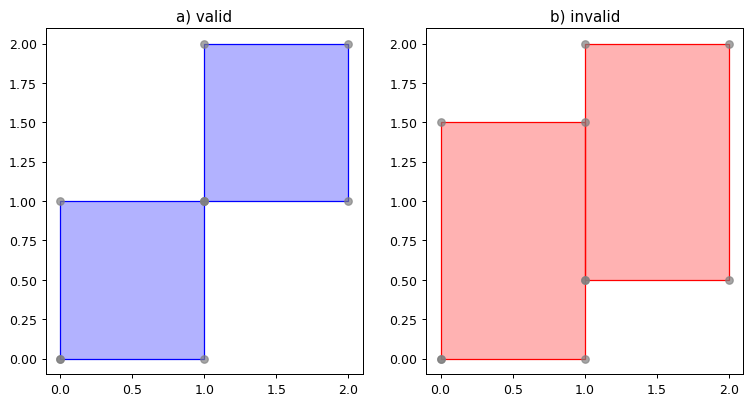

In [80]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
from shapely.plotting import plot_polygon, plot_points


fig = plt.figure(1, figsize=SIZE, dpi=90)

# 1: valid multi-polygon
ax = fig.add_subplot(121)

a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
b = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]

multi1 = MultiPolygon([[a, []], [b, []]])

plot_polygon(multi1, ax=ax, add_points=False, color=BLUE)
plot_points(multi1, ax=ax, color=GRAY, alpha=0.7)

ax.set_title('a) valid')

#2: invalid self-touching ring
ax = fig.add_subplot(122)

c = [(0, 0), (0, 1.5), (1, 1.5), (1, 0), (0, 0)]
d = [(1, 0.5), (1, 2), (2, 2), (2, 0.5), (1, 0.5)]

multi2 = MultiPolygon([[c, []], [d, []]])

plot_polygon(multi2, ax=ax, add_points=False, color=RED)
plot_points(multi2, ax=ax, color=GRAY, alpha=0.7)

ax.set_title('b) invalid')
plt.show()

In [81]:
from shapely import MultiPolygon

In [82]:
polygon, s, t

(<POLYGON ((0 0, 1 1, 1 0, 0 0))>,
 <POLYGON ((0 0, 1 1, 1 0, 0 0))>,
 <POLYGON ((0 -1, -0.098 -0.995, -0.195 -0.981, -0.29 -0.957, -0.383 -0.924, ...>)

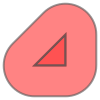

In [83]:
polygons = MultiPolygon([polygon, s, t])
polygons

In [84]:
len(polygons.geoms)

3

In [85]:
polygons.bounds

(-1.0, -1.0, 2.0, 2.0)

In [86]:
len(polygons.geoms)

3

#### Empty features

An “empty” feature is one with a point set that coincides with the empty set; not `None`, but like `set([])`. Empty features can be created by calling the various constructors with no arguments. Almost no operations are supported by empty features.

In [87]:
line = LineString()
line

In [88]:
line.is_empty

True

In [89]:
line.length, line.bounds

(0.0, (nan, nan, nan, nan))

In [90]:
list(line.coords)

[]

#### Coordinate sequences

The list of coordinates that describe a geometry are represented as the `CoordinateSequence` object. These sequences should not be initialized directly, but can be accessed from an existing geometry as the `Geometry.coords` property.

In [91]:
line = LineString([(0, 1), (2, 3), (4, 5)])
line.coords

In [92]:
line.coords[0]

(0.0, 1.0)

In [93]:
line.coords[1:]

[(2.0, 3.0), (4.0, 5.0)]

In [94]:
for x, y in line.coords:
    print(f"x={x}, y={y}")

x=0.0, y=1.0
x=2.0, y=3.0
x=4.0, y=5.0


In [95]:
poly = Polygon([(0, 0), (0, 1), (1, 1), (0, 0)])
poly.exterior.coords

In [96]:
p = MultiPoint([(0, 0), (1, 1), (2, 2)])
p.geoms[2].coords

#### Linear Referencing Methods

It can be useful to specify position along linear features such as LineStrings and MultiLineStrings with a 1-dimensional referencing system. Shapely supports linear referencing based on length or distance, evaluating the distance along a geometric object to the projection of a given point, or the point at a given distance along the object.

*object*.**interpolate**(*distance[, normalized=False]*)

Return a point at the specified distance along a linear geometric object.

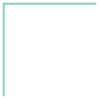

In [97]:
ip = LineString([(0, 0), (0, 1), (1, 1)])
ip

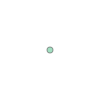

In [98]:
ip = ip.interpolate(1.5)
ip

In [99]:
ip.coords[:]

[(0.5, 1.0)]

In [100]:
LineString([(0, 0), (0, 1), (1, 1)]).interpolate(0.75).coords[:]

[(0.0, 0.75)]

In [101]:
LineString([(0, 0), (0, 1), (1, 1)]).interpolate(0.75, normalized=True).coords[:]

[(0.5, 1.0)]

object.**project**(other[, normalized=False])

Returns the distance along this geometric object to a point nearest the other object.

In [102]:
LineString([(0, 0), (0, 1), (1, 1)]).project(ip)

1.5

In [103]:
LineString([(0, 0), (0, 1), (1, 1)]).project(ip, normalized=True)

0.75

In [104]:
def cut(line, distance):
    # Cuts a line in two at a distance from its starting point
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]

In [105]:
line = LineString([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)])
print([list(x.coords) for x in cut(line, 1.0)])

[[(0.0, 0.0), (1.0, 0.0)], [(1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]


In [106]:
print([list(x.coords) for x in cut(line, 2.5)])

[[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (2.5, 0.0)], [(2.5, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]


object.**equals**(other)

Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.

In [107]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(0, 0), (0.5, 0.5), (1, 1)])
c = LineString([(0, 0), (0, 0), (1, 1)])

In [108]:
a == b, b.equals(c), b == c

(False, True, False)

In [109]:
b.equals_exact(c, tolerance=0)

False

object.**contains**(other)

Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.

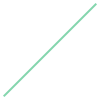

In [110]:
coords = [(0, 0), (1, 1)]
line = LineString(coords)
line

In [111]:
line.contains(Point(0.5, 0.5))

True

In [112]:
Point(0.5, 0.5).within(LineString(coords))

True

In [113]:
LineString(coords).contains(Point(1.0, 1.0))

False

In [114]:
line = LineString(coords)
contained = list(filter(line.contains, [Point(), Point(0.5, 0.5)]))
len(contained)

1

In [115]:
contained

[<POINT (0.5 0.5)>]

object.**crosses**(other)

Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.

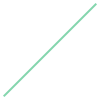

In [116]:
line

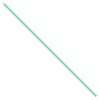

In [117]:
LineString([(0, 1), (1, 0)])

In [118]:
line.crosses(LineString([(0, 1), (1, 0)]))

True

In [119]:
LineString(coords).crosses(Point(0.5, 0.5))

False

object.**disjoint**(other)

Returns `True` if the boundary and interior of the object do not intersect at all with those of the other.

In [120]:
Point(0, 0).disjoint(Point(1, 1))

True

object.**intersects**(other)

Returns `True` if the boundary or interior of the object intersect in any way with those of the other.

In other words, geometric objects intersect if they have any boundary or interior point in common.

object.**overlaps**(other)

Returns `True` if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.

object.**touches**(other)

Returns `True` if the objects have at least one point in common and their interiors do not intersect with any part of the other.

In [121]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(1, 1), (2, 2)])
a.intersects(b), a.overlaps(b), a.touches(b)

(True, False, True)

object.**within**(other)

Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

In [122]:
a = Point(2, 2)
b = Polygon([[1, 1], [1, 3], [3, 3], [3, 1]])
c = Polygon([[0, 0], [0, 4], [4, 4], [4, 0]])
d = Point(-1, -1)

In [123]:
a.within(b)

True

### Spatial Analysis Methods

**object.boundary**

Returns a lower dimensional object representing the object’s set-theoretic boundary.

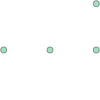

In [124]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines.boundary

In [125]:
list(lines.boundary.geoms)

[<POINT (-1 0)>, <POINT (0 0)>, <POINT (1 0)>, <POINT (1 1)>]

**object.centroid**

Returns a representation of the object’s geometric centroid (point).

In [126]:
print(LineString([(0, 0), (1, 1)]).centroid)

POINT (0.5 0.5)


**object.difference(other)**

Returns a representation of the points making up this geometric object that do not make up the other object.

In [127]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

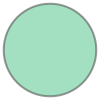

In [128]:
a

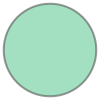

In [129]:
b

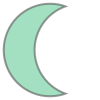

In [130]:
a.difference(b)

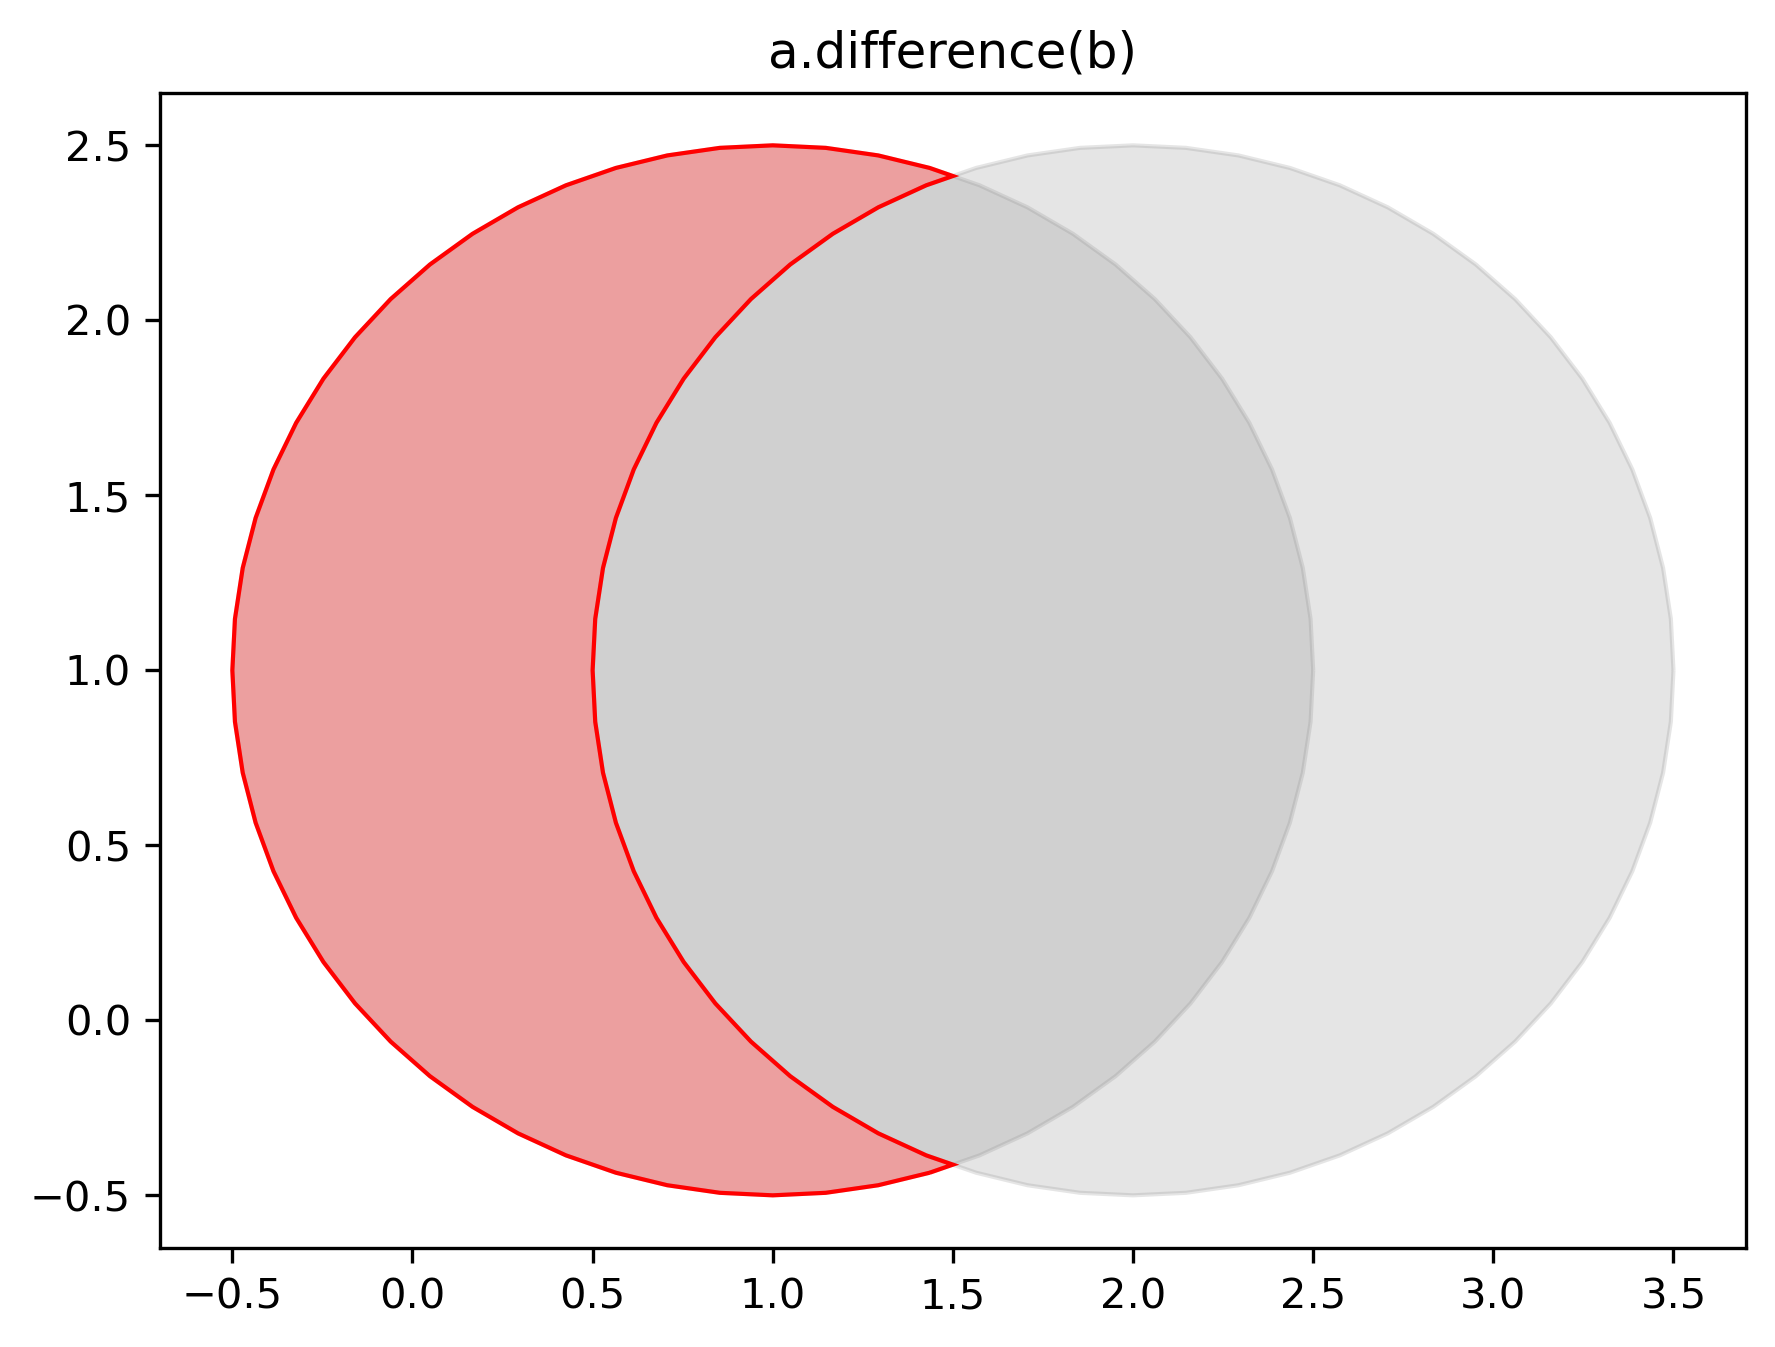

In [131]:
from shapely.plotting import plot_polygon

a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

fig = plt.figure(1, figsize=(15, 5), dpi=300)

# 1: valid multi-polygon
ax = fig.add_subplot(121)

plot_polygon(a, ax=ax, add_points=False, color=GRAY, alpha=0.2)
plot_polygon(b, ax=ax, add_points=False, color=GRAY, alpha=0.2)
plot_polygon(a.difference(b), ax=ax, add_points=False, color=RED)

ax.set_title('a.difference(b)');

**object.intersection(other)**

Returns a representation of the intersection of this object with the other geometric object.

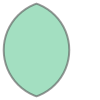

In [132]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.intersection(b)

In [133]:
print(a.intersection(b))

POLYGON ((2.4927770900082953 0.8529742895056591, 2.4711779206048456 0.7073645169758076, 2.4354105035983133 0.5645729841183065, 2.38581929876693 0.4259748514523654, 2.3228818965225324 0.2929048947610036, 2.247204418453818 0.1666446504705967, 2.1595156800441053 0.0484100737545318, 2.0606601717798214 -0.0606601717798212, 1.9515899262454681 -0.1595156800441056, 1.8333553495294035 -0.2472044184538178, 1.7070951052389967 -0.3228818965225324, 1.5740251485476349 -0.38581929876693, 1.5000000000000002 -0.4123059204384313, 1.4259748514523654 -0.38581929876693, 1.2929048947610036 -0.3228818965225326, 1.1666446504705972 -0.2472044184538182, 1.0484100737545319 -0.1595156800441058, 0.9393398282201788 -0.0606601717798214, 0.8404843199558945 0.0484100737545318, 0.752795581546182 0.1666446504705967, 0.6771181034774676 0.2929048947610032, 0.61418070123307 0.4259748514523651, 0.5645894964016867 0.5645729841183065, 0.5288220793951544 0.7073645169758072, 0.5072229099917047 0.8529742895056588, 0.5 0.99999999

**object.symmetric_difference(other)**

Returns a representation of the points in this object not in the other geometric object, and the points in the other not in this geometric object.

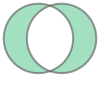

In [134]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.symmetric_difference(b)

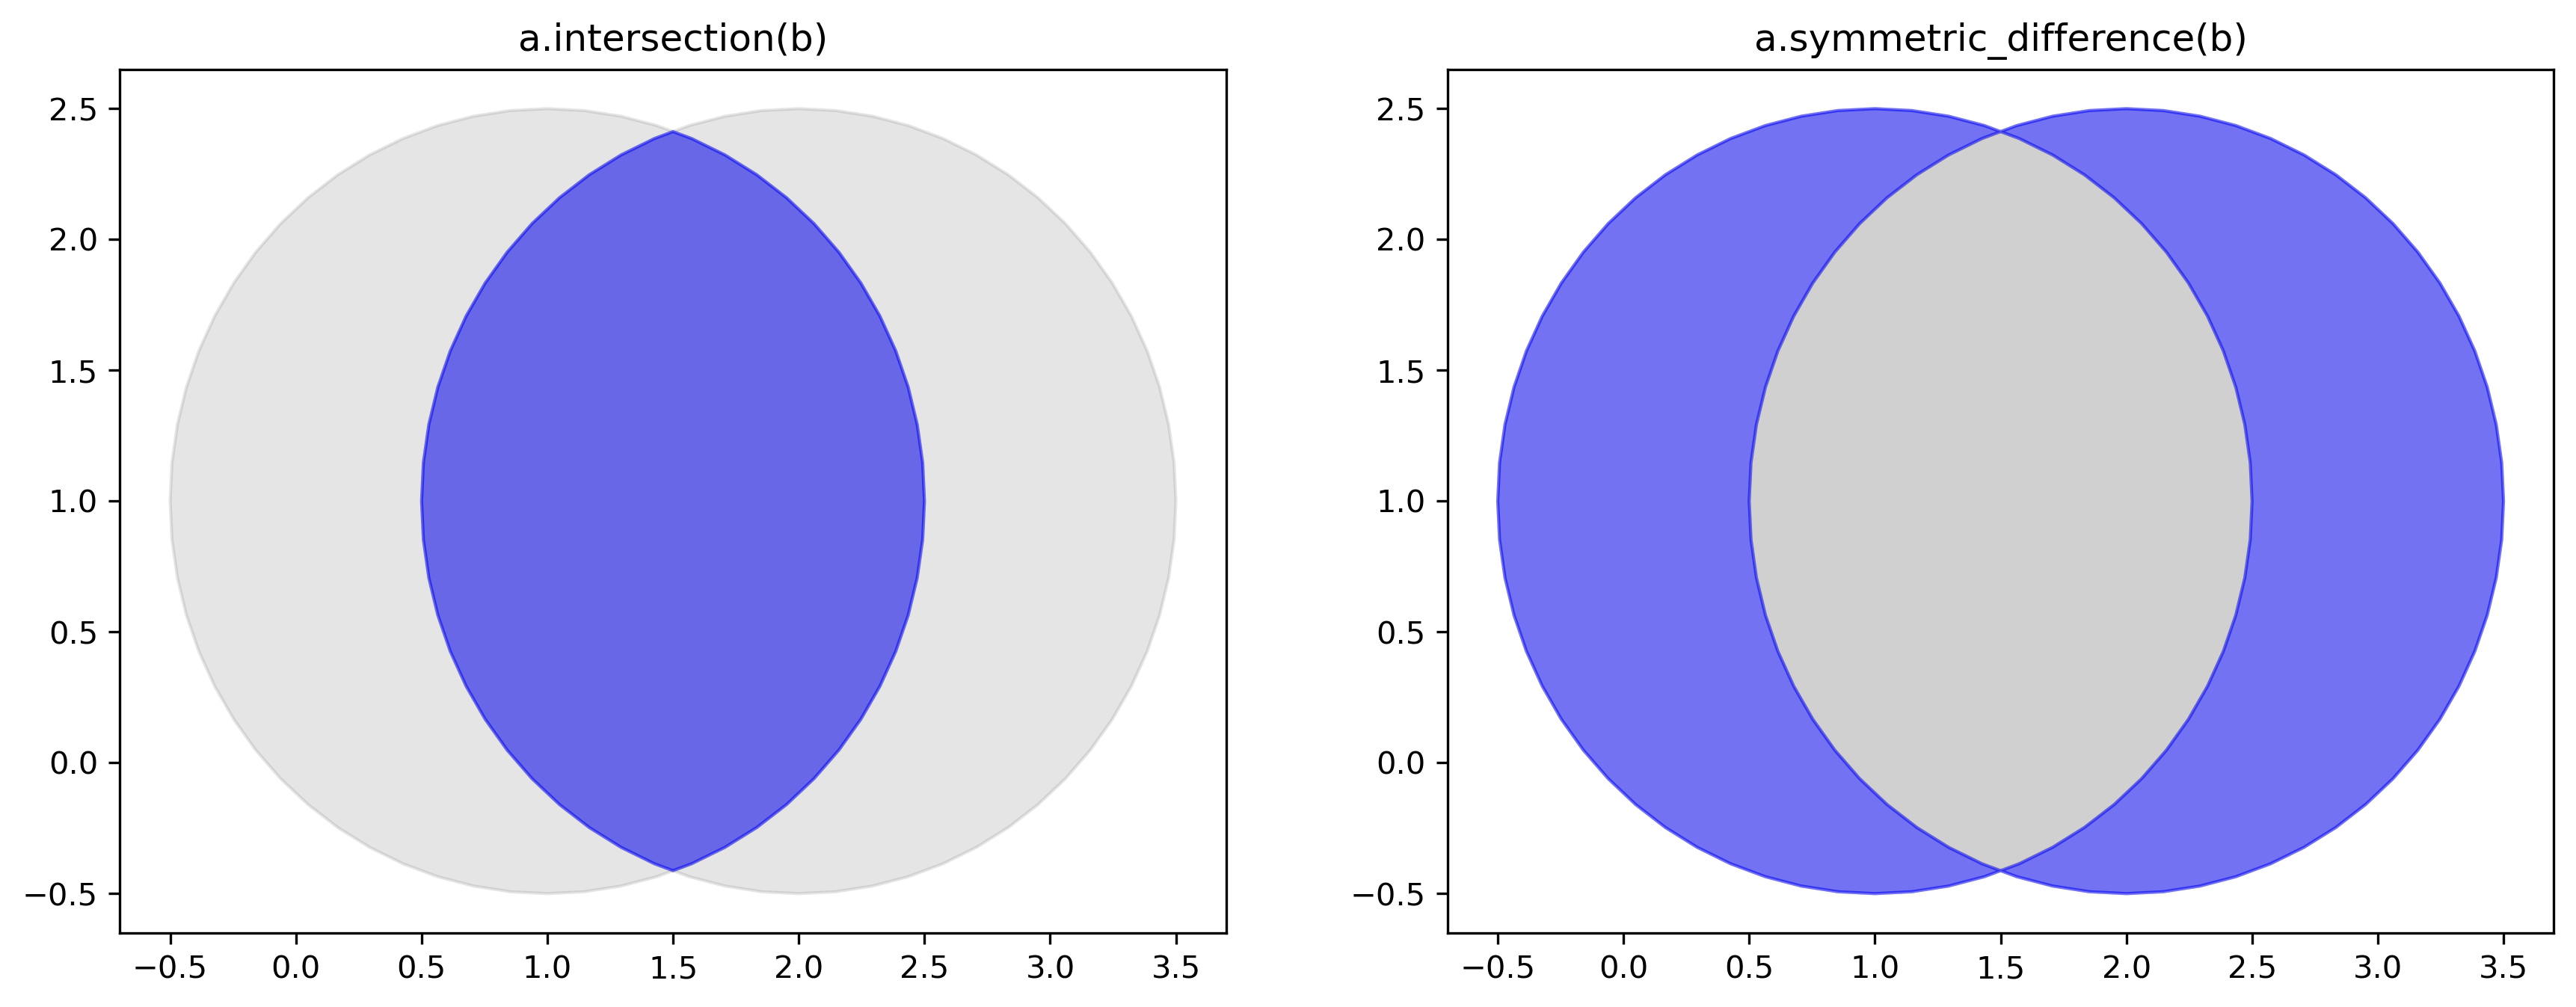

In [135]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.plotting import plot_polygon

fig = plt.figure(1, figsize=(14, 5), dpi=300)

a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

# 1
ax = fig.add_subplot(121)

plot_polygon(a, ax=ax, add_points=False, color=GRAY, alpha=0.2)
plot_polygon(b, ax=ax, add_points=False, color=GRAY, alpha=0.2)

c = a.intersection(b)
plot_polygon(c, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('a.intersection(b)')


#2
ax = fig.add_subplot(122)

plot_polygon(a, ax=ax, add_points=False, color=GRAY, alpha=0.2)
plot_polygon(b, ax=ax, add_points=False, color=GRAY, alpha=0.2)

c = a.symmetric_difference(b)
plot_polygon(c, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('a.symmetric_difference(b)')

plt.show()


**object.union(other)**

Returns a representation of the union of points from this object and the other geometric object.

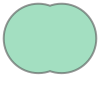

In [136]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.union(b)

In [137]:
print(a.union(b).boundary)

LINESTRING (1.4354270158816935 -0.4354105035983134, 1.2926354830241924 -0.4711779206048456, 1.147025710494341 -0.4927770900082953, 1 -0.5, 0.852974289505659 -0.4927770900082953, 0.7073645169758077 -0.4711779206048456, 0.5645729841183067 -0.4354105035983134, 0.4259748514523654 -0.38581929876693, 0.2929048947610034 -0.3228818965225326, 0.1666446504705971 -0.2472044184538182, 0.0484100737545319 -0.1595156800441058, -0.0606601717798212 -0.0606601717798214, -0.1595156800441056 0.0484100737545318, -0.247204418453818 0.1666446504705967, -0.3228818965225324 0.2929048947610032, -0.38581929876693 0.4259748514523651, -0.4354105035983134 0.5645729841183065, -0.4711779206048456 0.7073645169758072, -0.4927770900082953 0.8529742895056588, -0.5 0.9999999999999998, -0.4927770900082953 1.1470257104943409, -0.4711779206048456 1.2926354830241924, -0.4354105035983134 1.435427015881693, -0.3858192987669302 1.5740251485476344, -0.3228818965225326 1.7070951052389964, -0.2472044184538182 1.8333553495294028, -0

In [138]:
print(a.boundary.union(b.boundary))

MULTILINESTRING ((2.5 1, 2.4927770900082953 0.8529742895056591, 2.4711779206048456 0.7073645169758076, 2.4354105035983133 0.5645729841183065, 2.38581929876693 0.4259748514523654, 2.3228818965225324 0.2929048947610036, 2.247204418453818 0.1666446504705967, 2.1595156800441053 0.0484100737545318, 2.0606601717798214 -0.0606601717798212, 1.9515899262454681 -0.1595156800441056, 1.8333553495294035 -0.2472044184538178, 1.7070951052389967 -0.3228818965225324, 1.5740251485476349 -0.38581929876693, 1.5000000000000002 -0.4123059204384313), (1.5000000000000002 -0.4123059204384313, 1.4354270158816935 -0.4354105035983134, 1.2926354830241924 -0.4711779206048456, 1.147025710494341 -0.4927770900082953, 1 -0.5, 0.852974289505659 -0.4927770900082953, 0.7073645169758077 -0.4711779206048456, 0.5645729841183067 -0.4354105035983134, 0.4259748514523654 -0.38581929876693, 0.2929048947610034 -0.3228818965225326, 0.1666446504705971 -0.2472044184538182, 0.0484100737545319 -0.1595156800441058, -0.0606601717798212 -

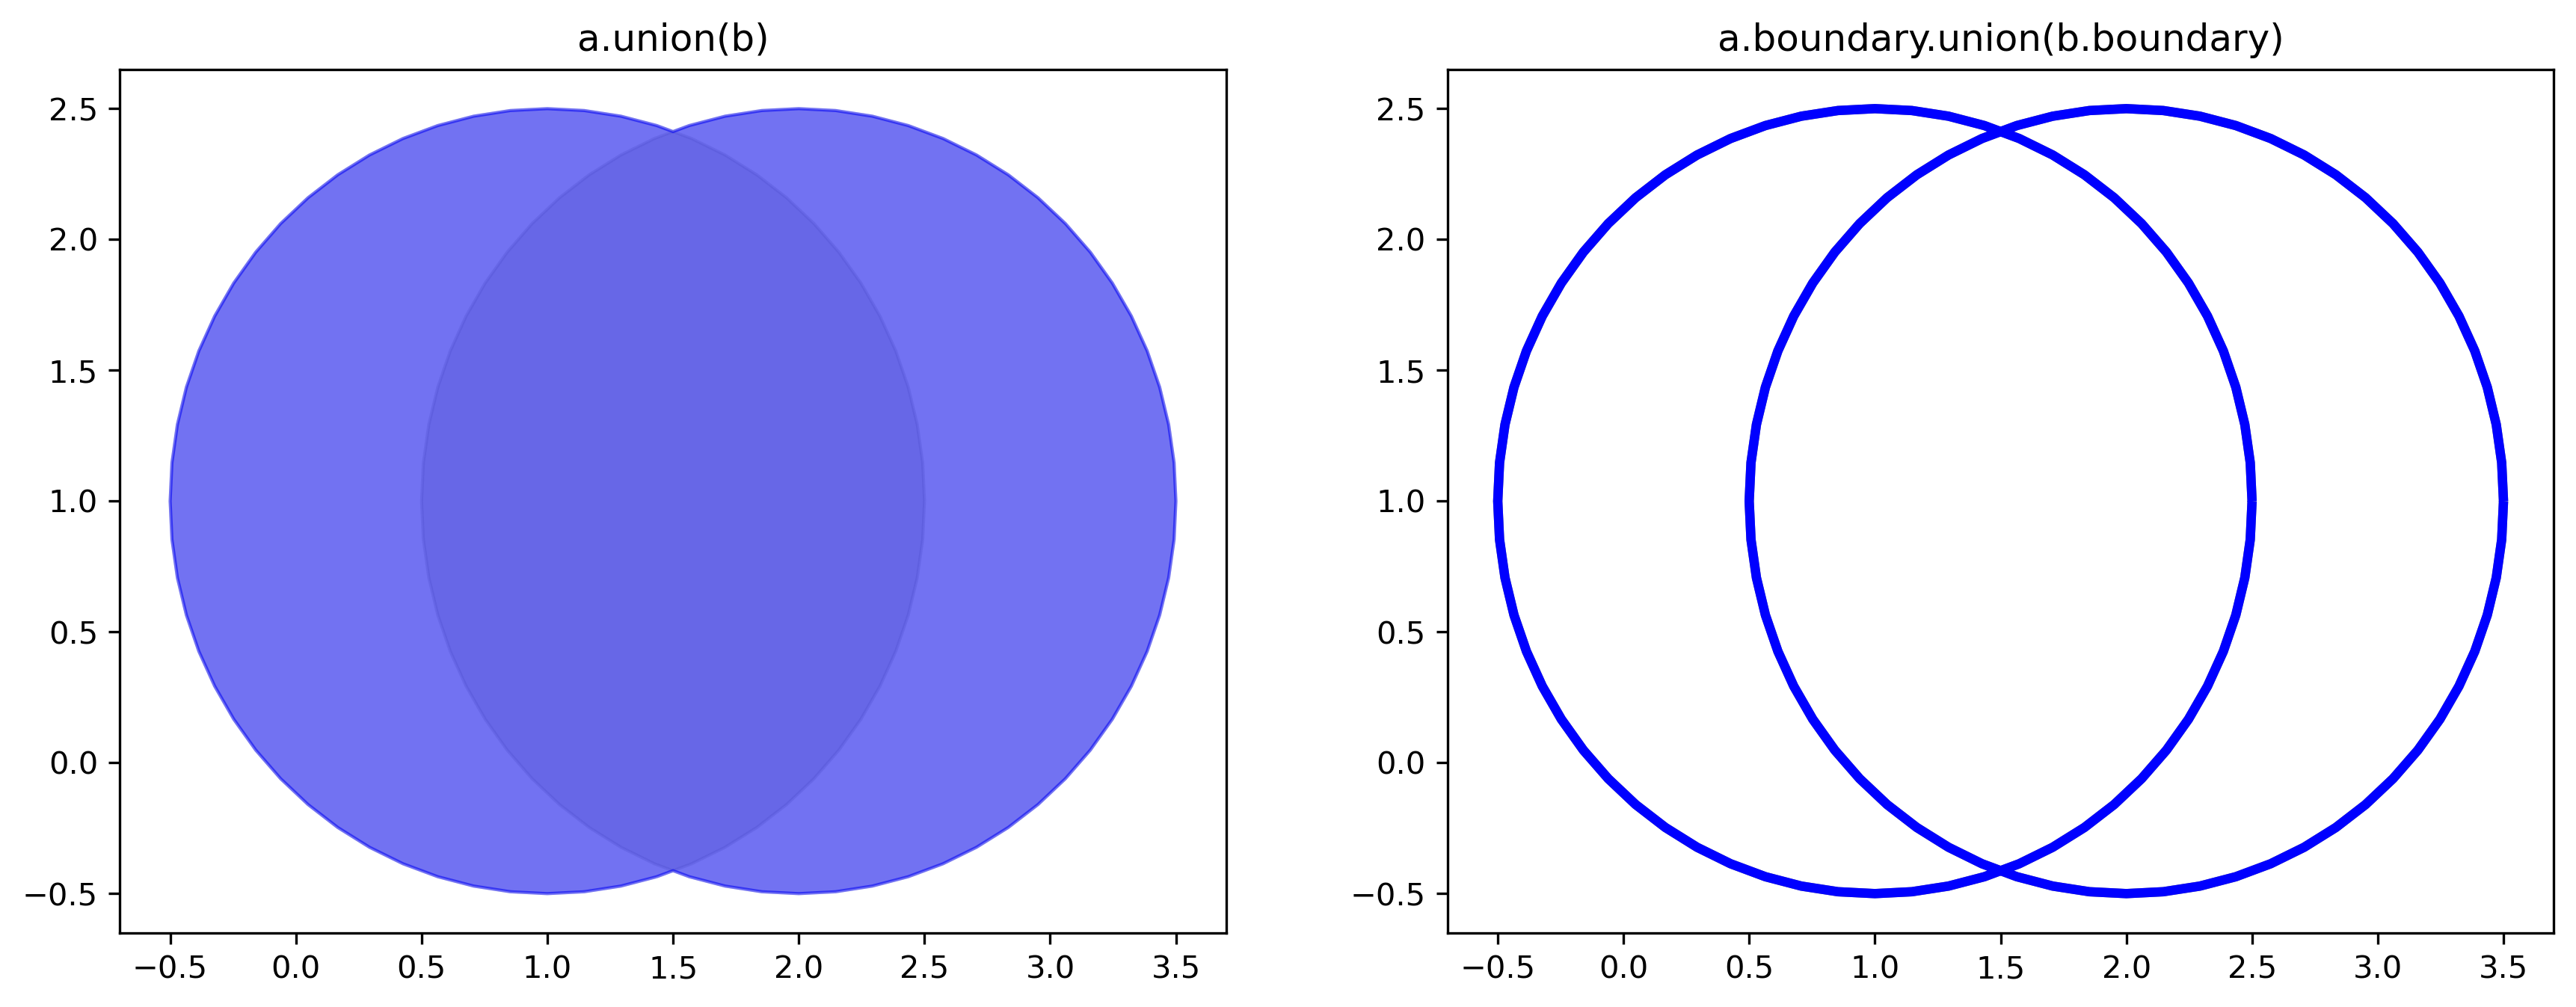

In [139]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.plotting import plot_polygon, plot_line

SIZE = (14, 5)
fig = plt.figure(1, figsize=SIZE, dpi=300)

a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

# 1
ax = fig.add_subplot(121)

plot_polygon(a, ax=ax, add_points=False, color=GRAY, alpha=0.2)
plot_polygon(b, ax=ax, add_points=False, color=GRAY, alpha=0.2)

c = a.union(b)
plot_polygon(c, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('a.union(b)')

#2
ax = fig.add_subplot(122)

plot_line(a.exterior, ax=ax, add_points=False, color=GRAY, linewidth=3)
plot_line(b.exterior, ax=ax, add_points=False, color=GRAY, linewidth=3)

u = a.exterior.union(b.exterior)
plot_line(u, ax=ax, add_points=False, color=BLUE, linewidth=3)

ax.set_title('a.boundary.union(b.boundary)')

plt.show()


- intersection can be accessed with and, &
- union can be accessed with or, |
- difference can be accessed with minus, -
- symmetric_difference can be accessed with xor, ^

In [140]:
from shapely import wkt
p1 = wkt.loads('POLYGON((0 0, 1 0, 1 1, 0 1, 0 0))')
p2 = wkt.loads('POLYGON((0.5 0, 1.5 0, 1.5 1, 0.5 1, 0.5 0))')

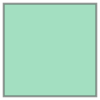

In [141]:
p1

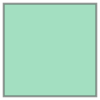

In [142]:
p2

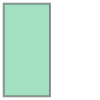

In [143]:
p1 & p2

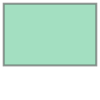

In [144]:
p1 | p2

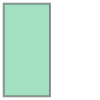

In [145]:
p1 - p2

In [146]:
(p1 ^ p2).wkt

'MULTIPOLYGON (((0 0, 0 1, 0.5 1, 0.5 0, 0 0)), ((1 1, 1.5 1, 1.5 0, 1 0, 1 1)))'

**object.buffer(distance, quad_segs=16, cap_style=1, join_style=1, mitre_limit=5.0, single_sided=False)**

Returns an approximate representation of all points within a given distance of the this geometric object.

The styles of caps are specified by integer values: 1 (round), 2 (flat), 3 (square). These values are also enumerated by the object shapely.BufferCapStyle (see below).

The styles of joins between offset segments are specified by integer values: 1 (round), 2 (mitre), and 3 (bevel). These values are also enumerated by the object shapely.BufferJoinStyle (see below).

`shapely.BufferCapStyle`
| Attribute | Value |
| :---------: | :-----: |
| round | 1 |
| flat | 2 |
| square | 3 |

`shapely.BufferJoinStyle`
| Attribute | Value |
| :---------: | :-----: |
| round | 1 |
| mitre | 2 |
| bevel | 3 |

In [147]:
from shapely import BufferCapStyle, BufferJoinStyle

BufferCapStyle.flat.value, BufferJoinStyle.bevel.value

(2, 3)

In [148]:
BufferJoinStyle

<enum 'BufferJoinStyle'>

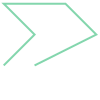

In [149]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line

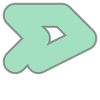

In [150]:
dilated = line.buffer(0.5)
dilated

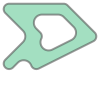

In [151]:
eroded = dilated.buffer(-0.3)
eroded

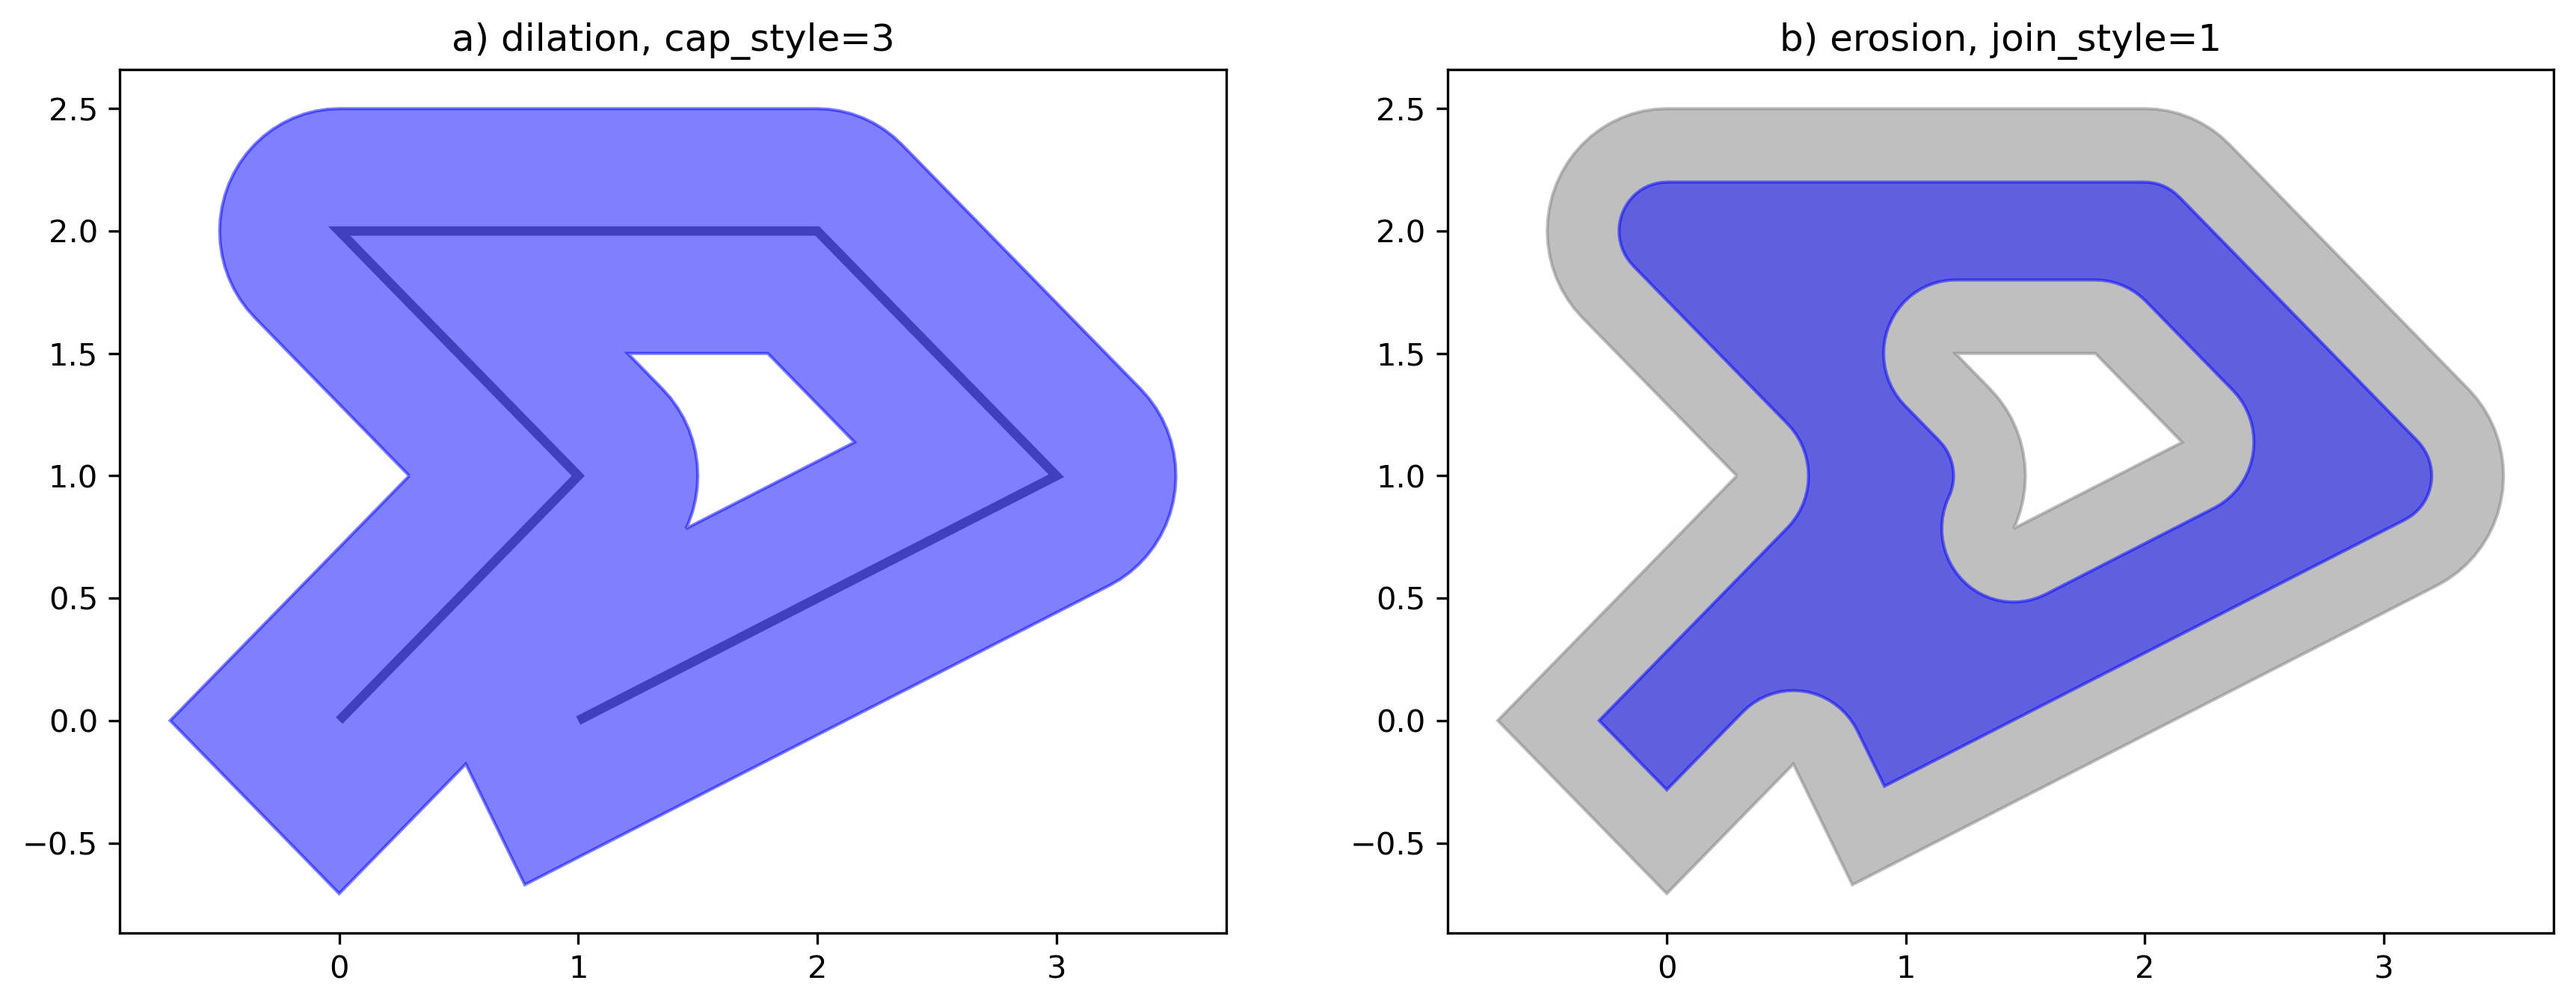

In [152]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from shapely.plotting import plot_polygon, plot_line

line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

fig = plt.figure(1, figsize=SIZE, dpi=300)

# 1
ax = fig.add_subplot(121)

plot_line(line, ax=ax, add_points=False, color=GRAY, linewidth=3)

dilated = line.buffer(0.5, cap_style=3)
plot_polygon(dilated, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('a) dilation, cap_style=3')

#2
ax = fig.add_subplot(122)

plot_polygon(dilated, ax=ax, add_points=False, color=GRAY, alpha=0.5)

eroded = dilated.buffer(-0.3)
plot_polygon(eroded, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('b) erosion, join_style=1')

plt.show()


In [153]:
p = Point(0, 0).buffer(10.0)
len(p.exterior.coords)

65

In [154]:
p.area

313.6548490545941

In [156]:
q = Point(0, 0).buffer(10.0, quad_segs=1)
len(q.exterior.coords)

5

In [157]:
q.area

200.0

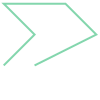

In [158]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line

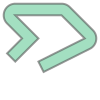

In [159]:
left_hand_side = line.buffer(0.5, single_sided=True)
left_hand_side

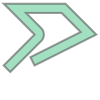

In [160]:
right_hand_side = line.buffer(-0.3, single_sided=True)
right_hand_side

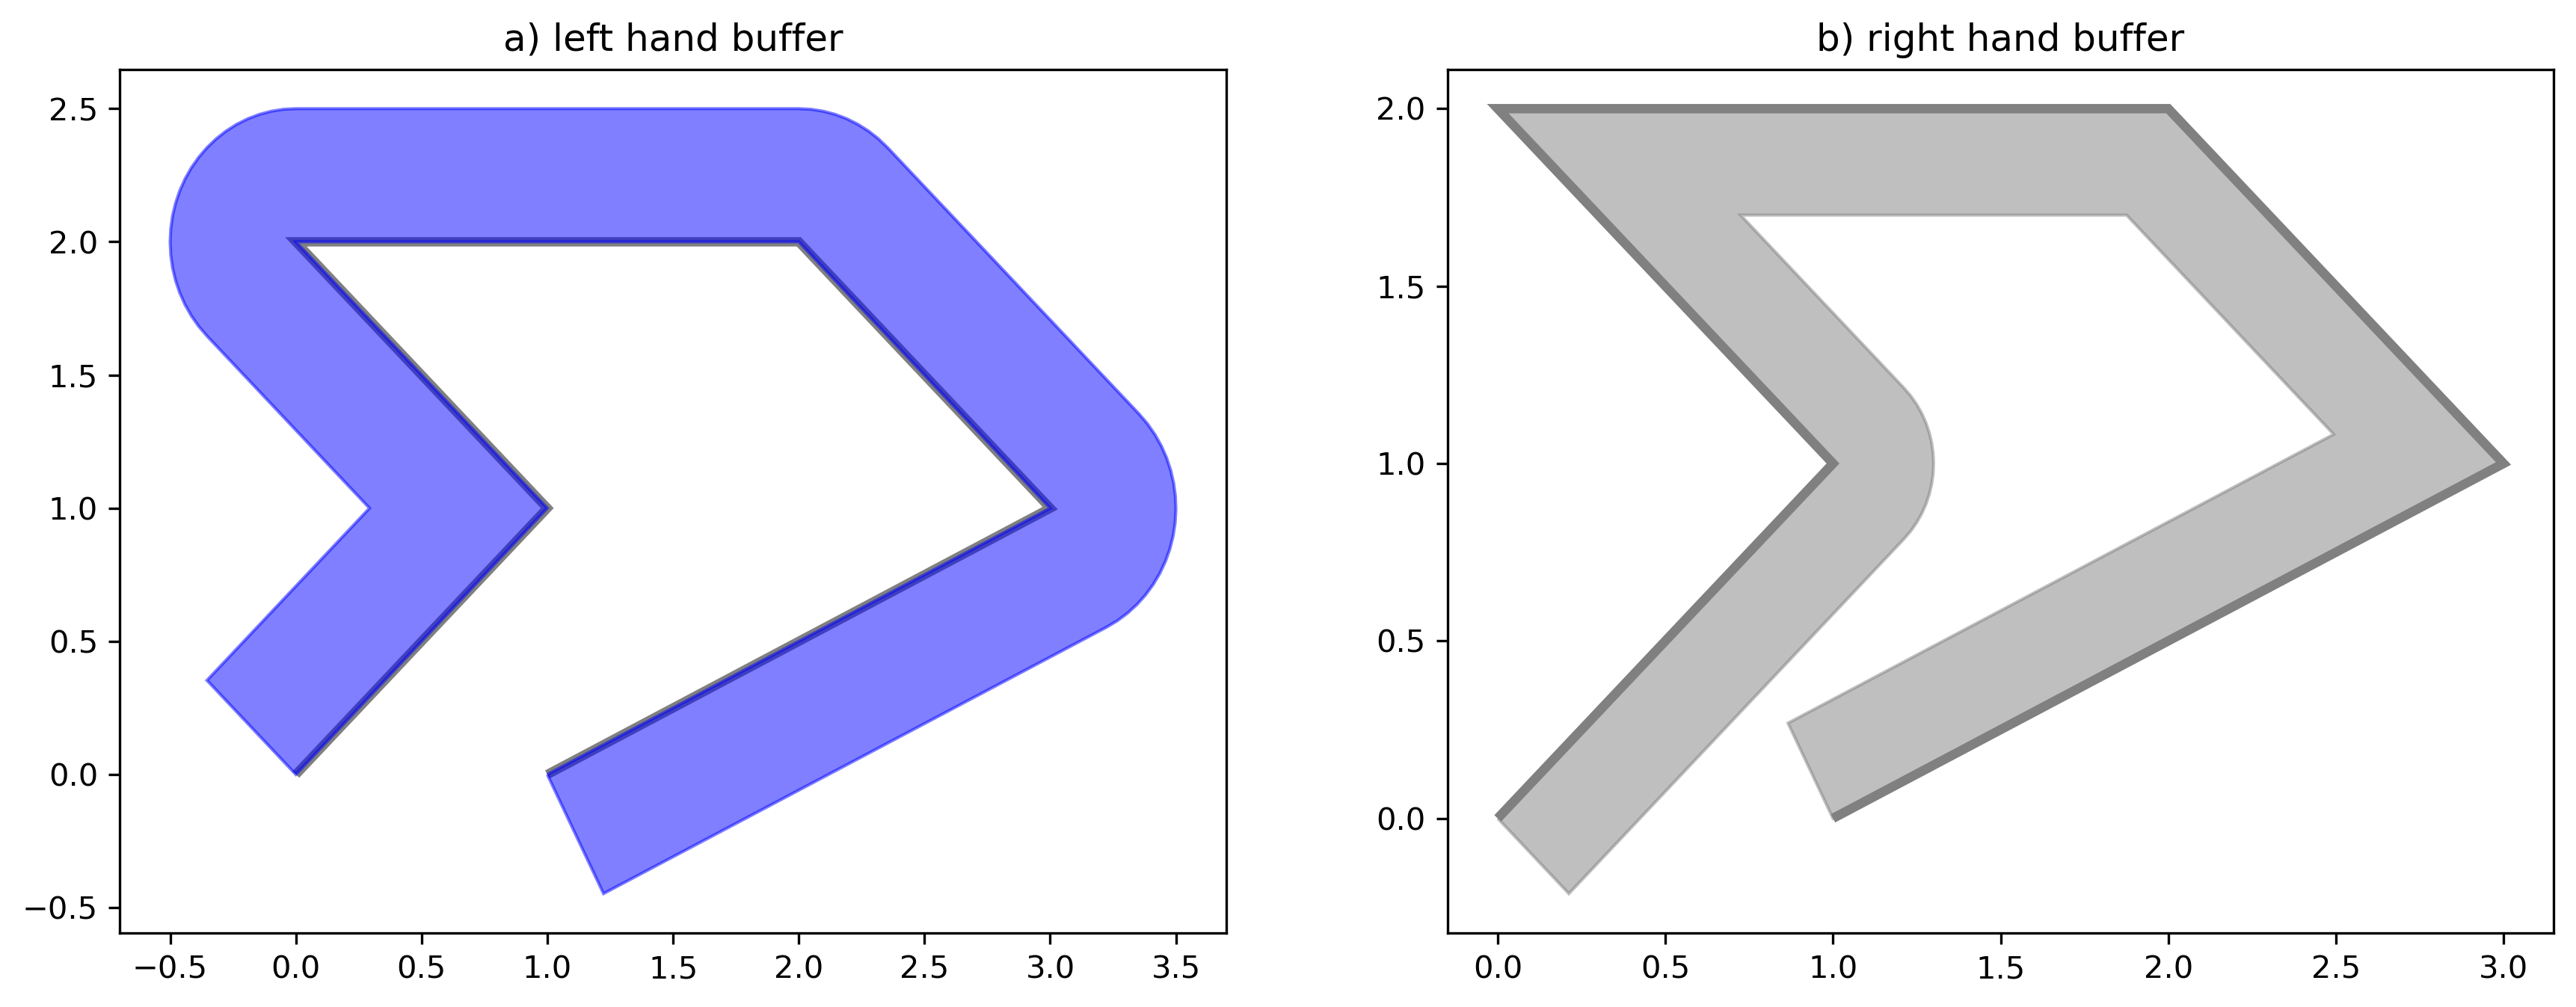

In [161]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from shapely.plotting import plot_polygon, plot_line

line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

fig = plt.figure(1, figsize=SIZE, dpi=300)

# 1
ax = fig.add_subplot(121)

plot_line(line, ax=ax, add_points=False, color=GRAY, linewidth=3)

left_hand_side = line.buffer(0.5, single_sided=True)
plot_polygon(left_hand_side, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('a) left hand buffer')

#2
ax = fig.add_subplot(122)

plot_line(line, ax=ax, add_points=False, color=GRAY, linewidth=3)

right_hand_side = line.buffer(-0.3, single_sided=True)
plot_polygon(right_hand_side, ax=ax, add_points=False, color=GRAY, alpha=0.5)

ax.set_title('b) right hand buffer')

plt.show()


Passed a distance of 0, `buffer()` can sometimes be used to “clean” self-touching or self-crossing polygons such as the classic “bowtie”. Users have reported that very small distance values sometimes produce cleaner results than 0. Your mileage may vary when cleaning surfaces.

In [162]:
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
bowtie = Polygon(coords)
bowtie.is_valid

False

In [163]:
clean = bowtie.buffer(0)
clean.is_valid

True

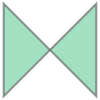

In [164]:
clean

In [165]:
len(clean.geoms)

2

In [166]:
list(clean.geoms[0].exterior.coords), list(clean.geoms[1].exterior.coords)

([(0.0, 0.0), (0.0, 2.0), (1.0, 1.0), (0.0, 0.0)],
 [(1.0, 1.0), (2.0, 2.0), (2.0, 0.0), (1.0, 1.0)])

**object.convex_hull**

Returns a representation of the smallest convex Polygon containing all the points in the object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

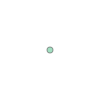

In [167]:
Point(0, 0).convex_hull

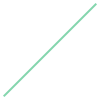

In [168]:
MultiPoint([(0, 0), (1, 1)]).convex_hull

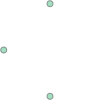

In [170]:
MultiPoint([(0, 0), (1, 1), (1, -1)])

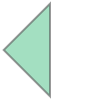

In [171]:
MultiPoint([(0, 0), (1, 1), (1, -1)]).convex_hull

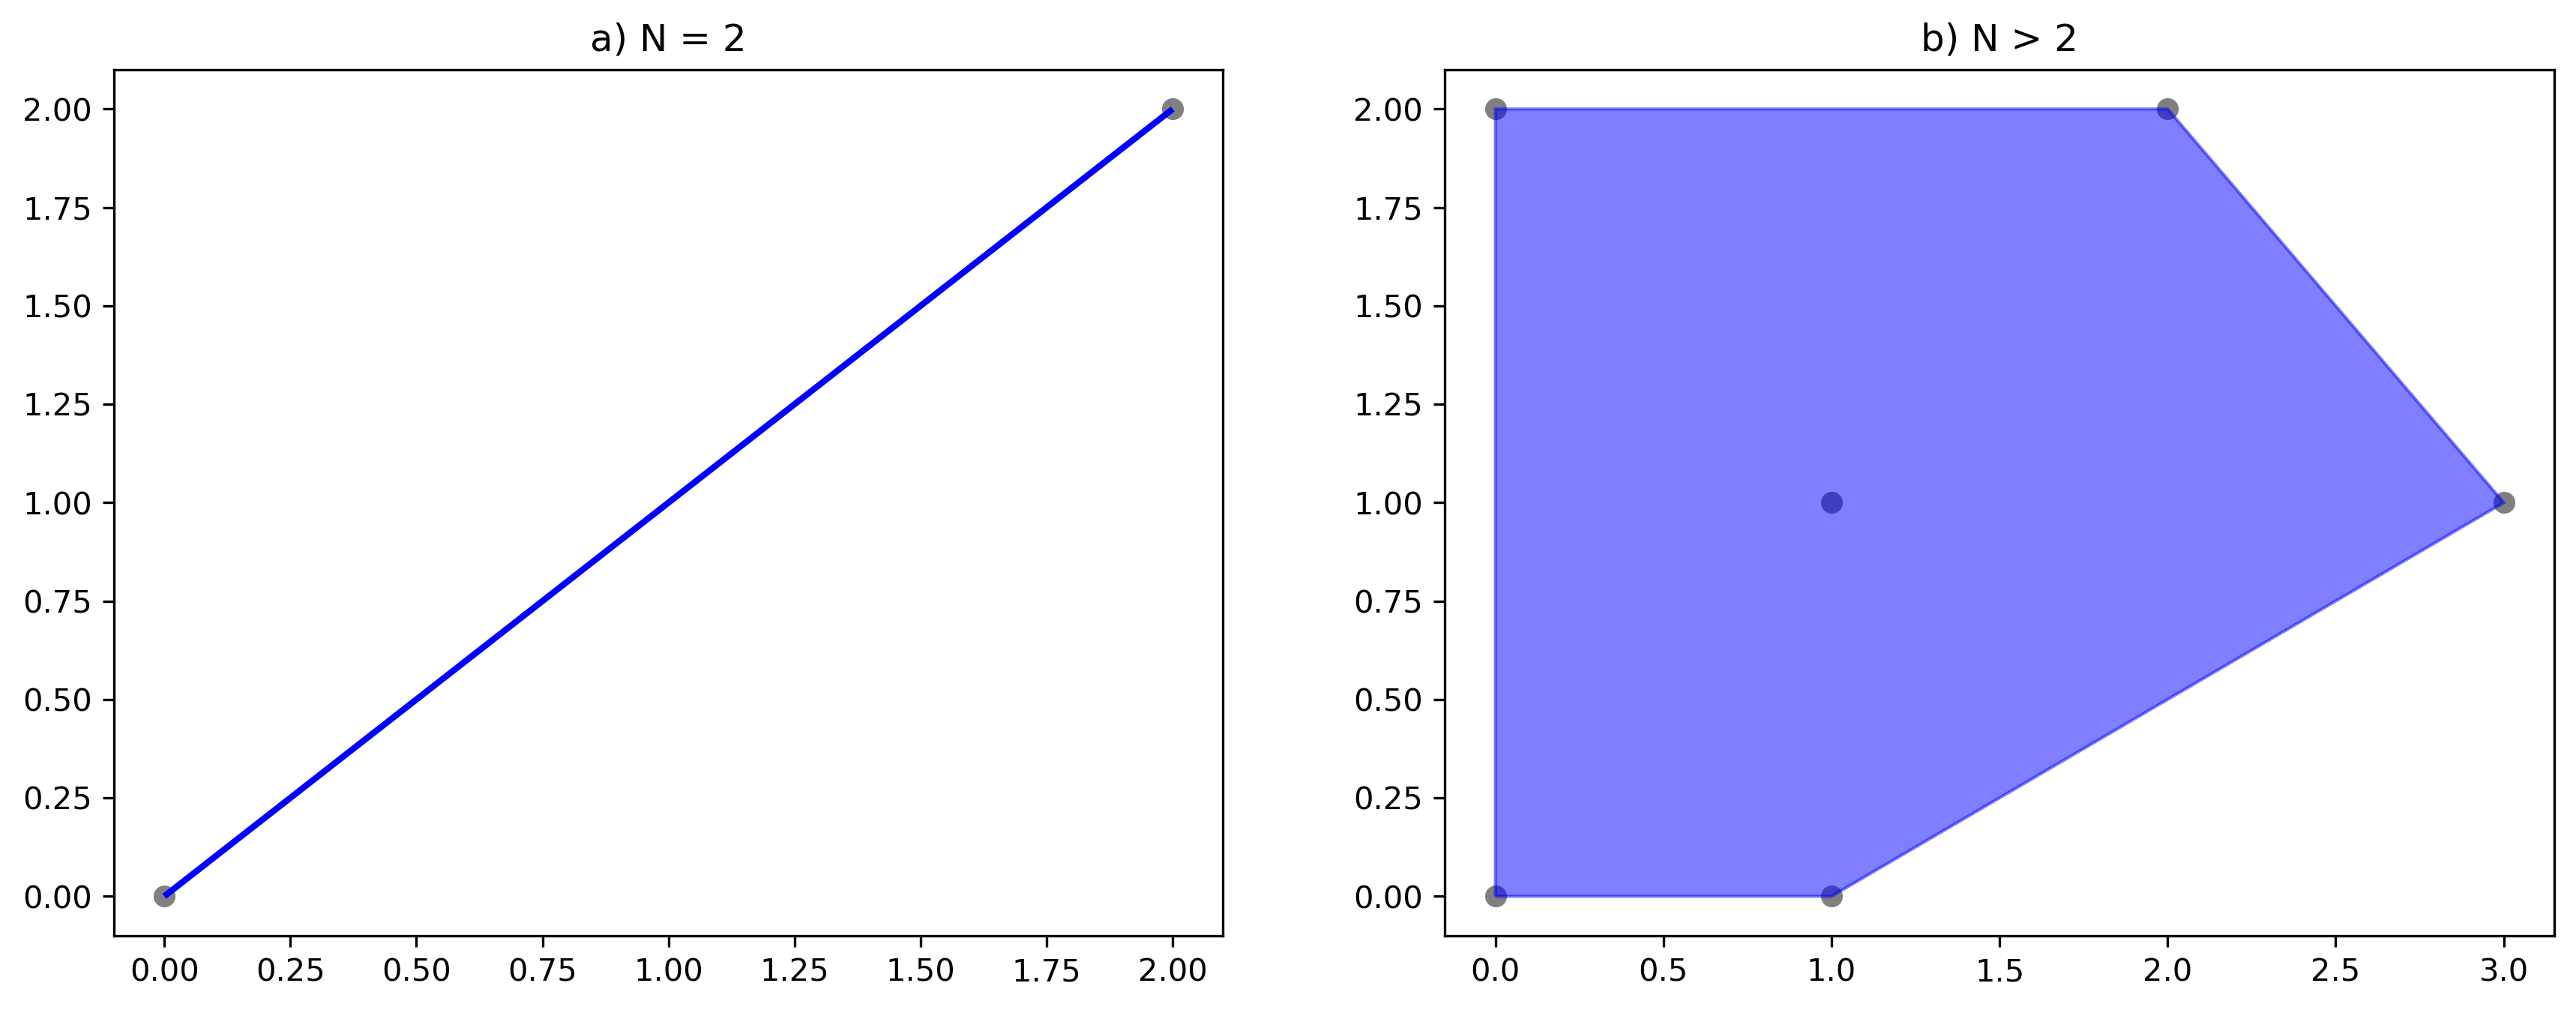

In [172]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
from shapely.plotting import plot_polygon, plot_line, plot_points

fig = plt.figure(1, figsize=SIZE, dpi=300)

# 1
ax = fig.add_subplot(121)

points2 = MultiPoint([(0, 0), (2, 2)])
plot_points(points2, ax=ax, color=GRAY)

hull2 = points2.convex_hull
plot_line(hull2, ax=ax, add_points=False, color=BLUE, zorder=3)

ax.set_title('a) N = 2')

#2
ax = fig.add_subplot(122)

points1 = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
plot_points(points1, ax=ax, color=GRAY)

hull1 = points1.convex_hull
plot_polygon(hull1, ax=ax, add_points=False, color=BLUE, zorder=3, alpha=0.5)

ax.set_title('b) N > 2')

plt.show()

**object.parallel_offset(distance, side, resolution=16, join_style=1, mitre_limit=5.0)**

Returns a LineString or MultiLineString geometry at a distance from the object on its right or its left side.

Older alternative method to the offset_curve() method, but uses resolution instead of quad_segs and a side keyword (‘left’ or ‘right’) instead of sign of the distance. This method is kept for backwards compatibility for now, but is is recommended to use offset_curve() instead.

**object.offset_curve(distance, quad_segs=16, join_style=1, mitre_limit=5.0)**

Returns a LineString or MultiLineString geometry at a distance from the object on its right or its left side.

The distance parameter must be a float value.

The side is determined by the sign of the distance parameter (negative for right side offset, positive for left side offset). Left and right are determined by following the direction of the given geometric points of the LineString.

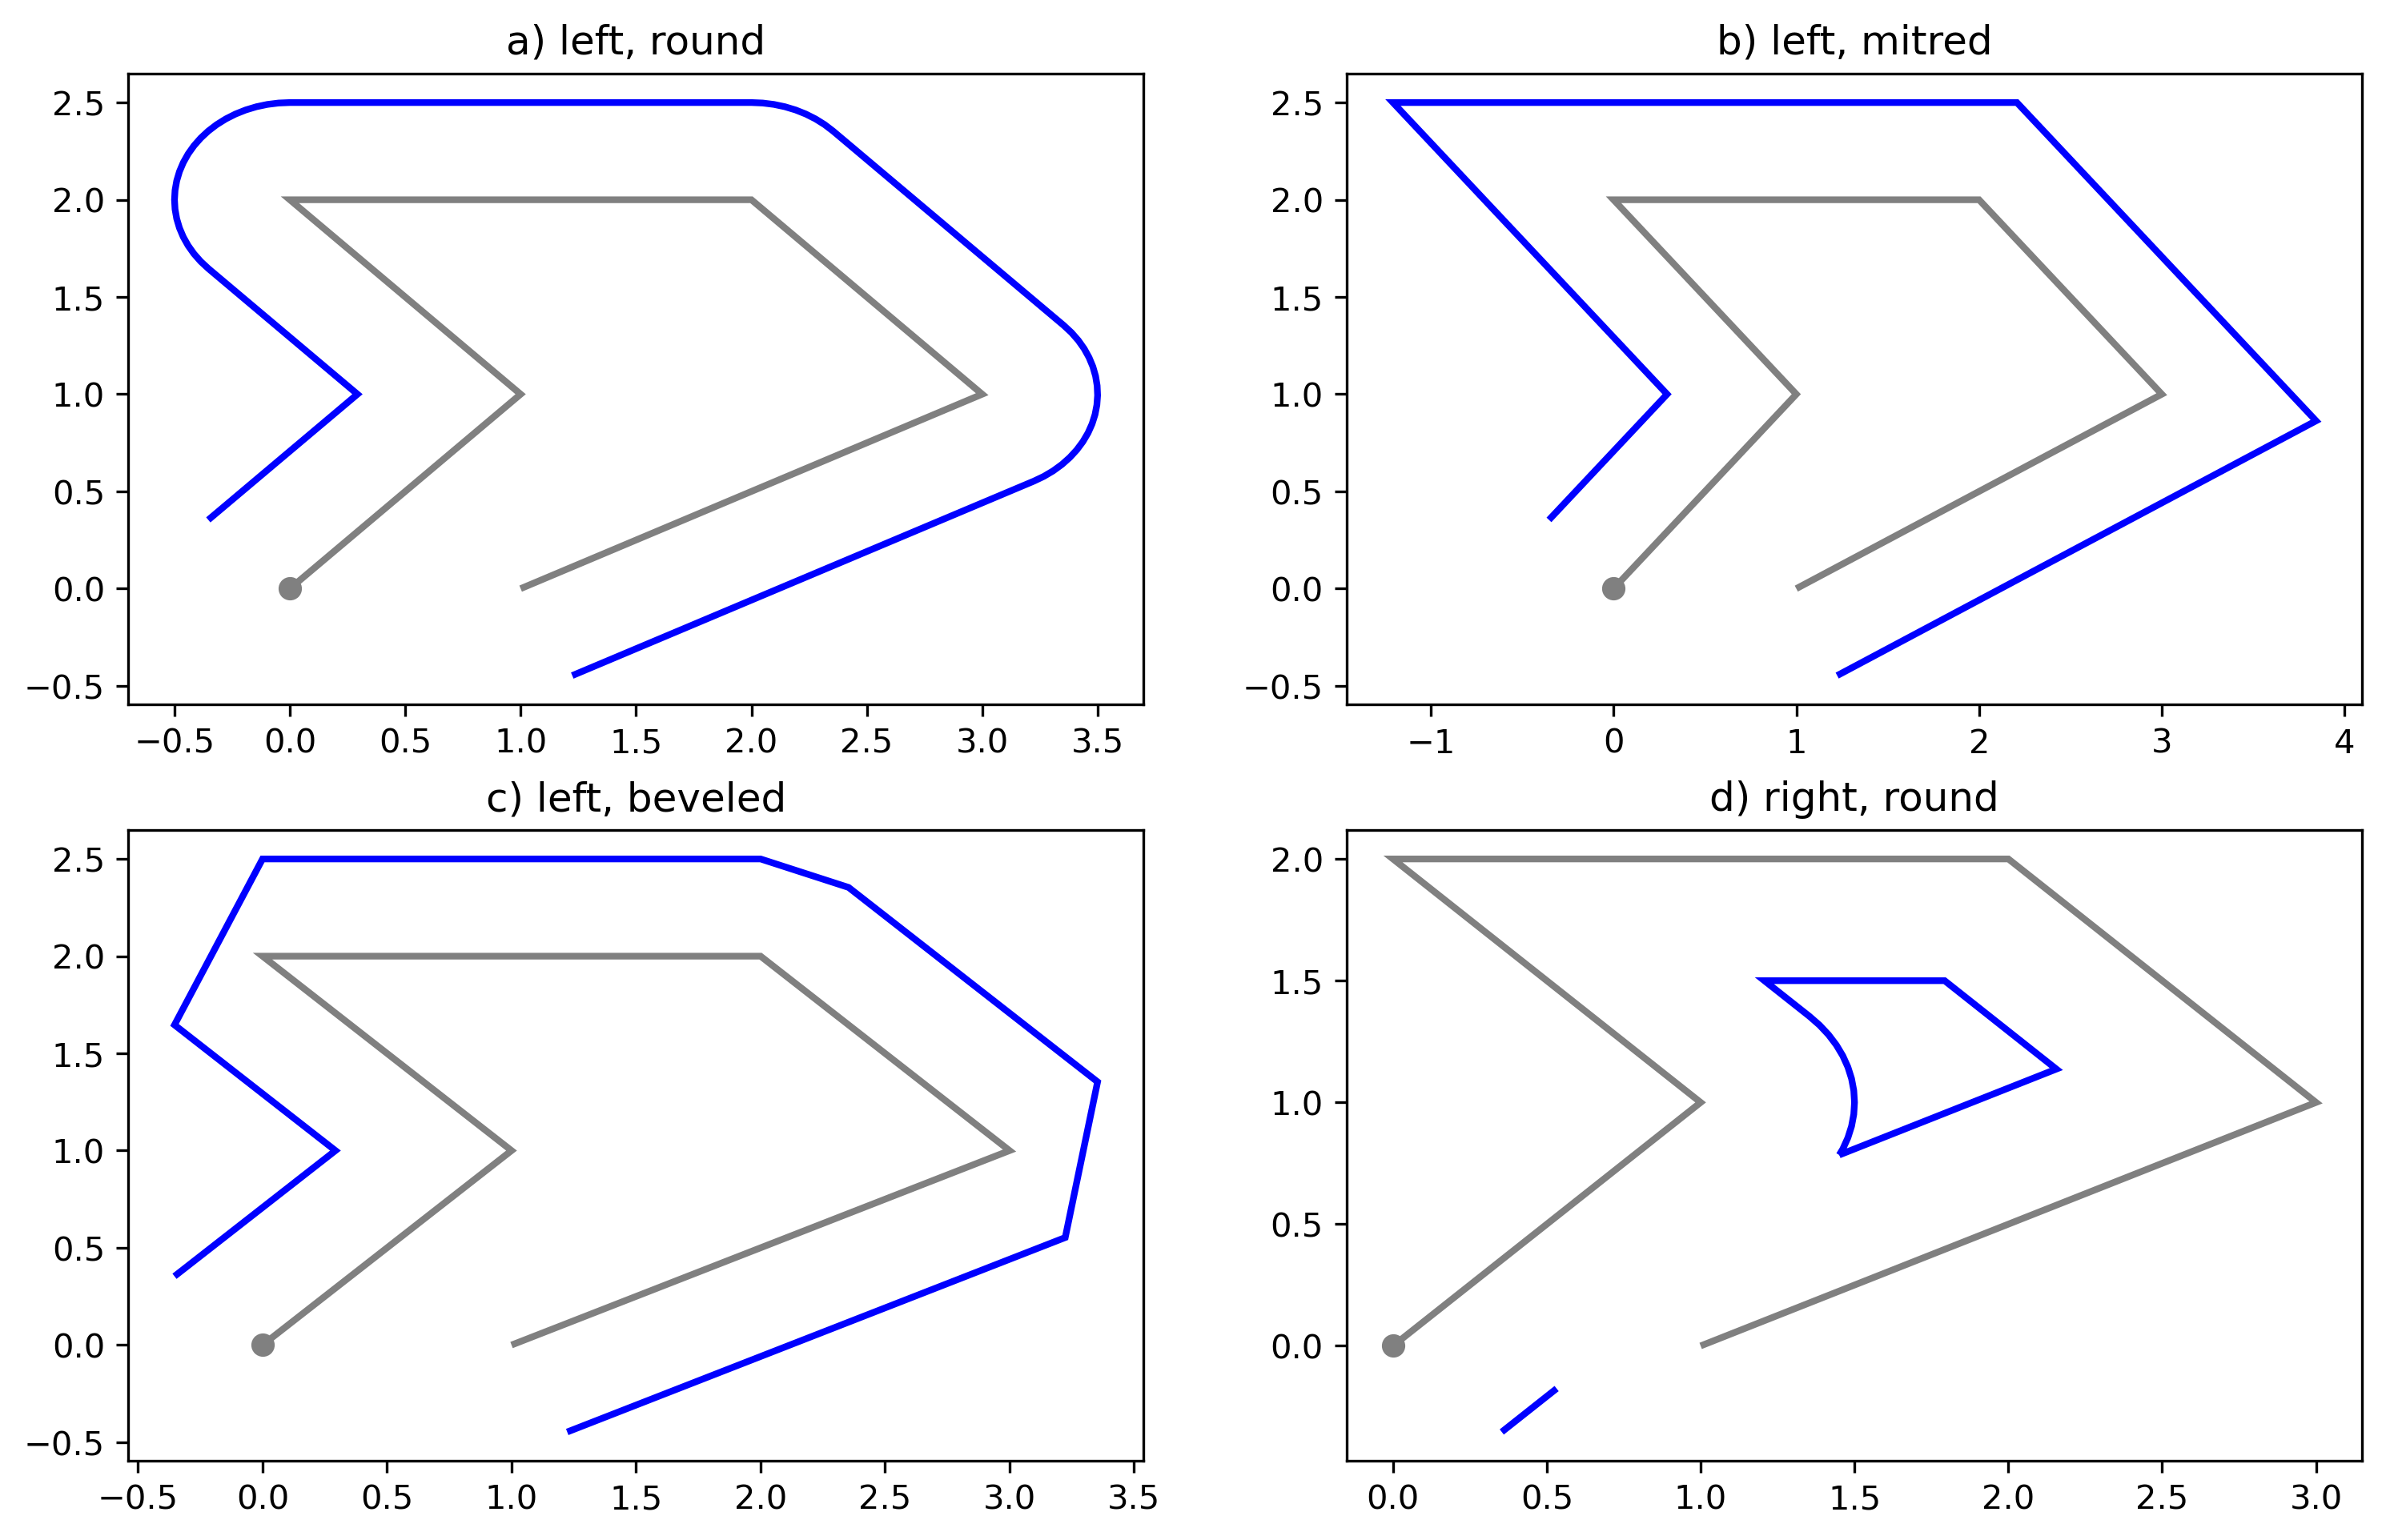

In [174]:
import matplotlib.pyplot as plt
from shapely import LineString, get_point
from shapely.plotting import plot_line, plot_points


line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line_bounds = line.bounds
ax_range = [int(line_bounds[0] - 1.0), int(line_bounds[2] + 1.0)]
ay_range = [int(line_bounds[1] - 1.0), int(line_bounds[3] + 1.0)]

SIZE = (12, 5)
fig = plt.figure(1, figsize=(SIZE[0], 1.5 * SIZE[1]), dpi=300)

# 1
ax = fig.add_subplot(221)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'left', join_style=1)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('a) left, round')

#2
ax = fig.add_subplot(222)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'left', join_style=2)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('b) left, mitred')

#3
ax = fig.add_subplot(223)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'left', join_style=3)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('c) left, beveled')

#4
ax = fig.add_subplot(224)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'right', join_style=1)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('d) right, round')

plt.show()


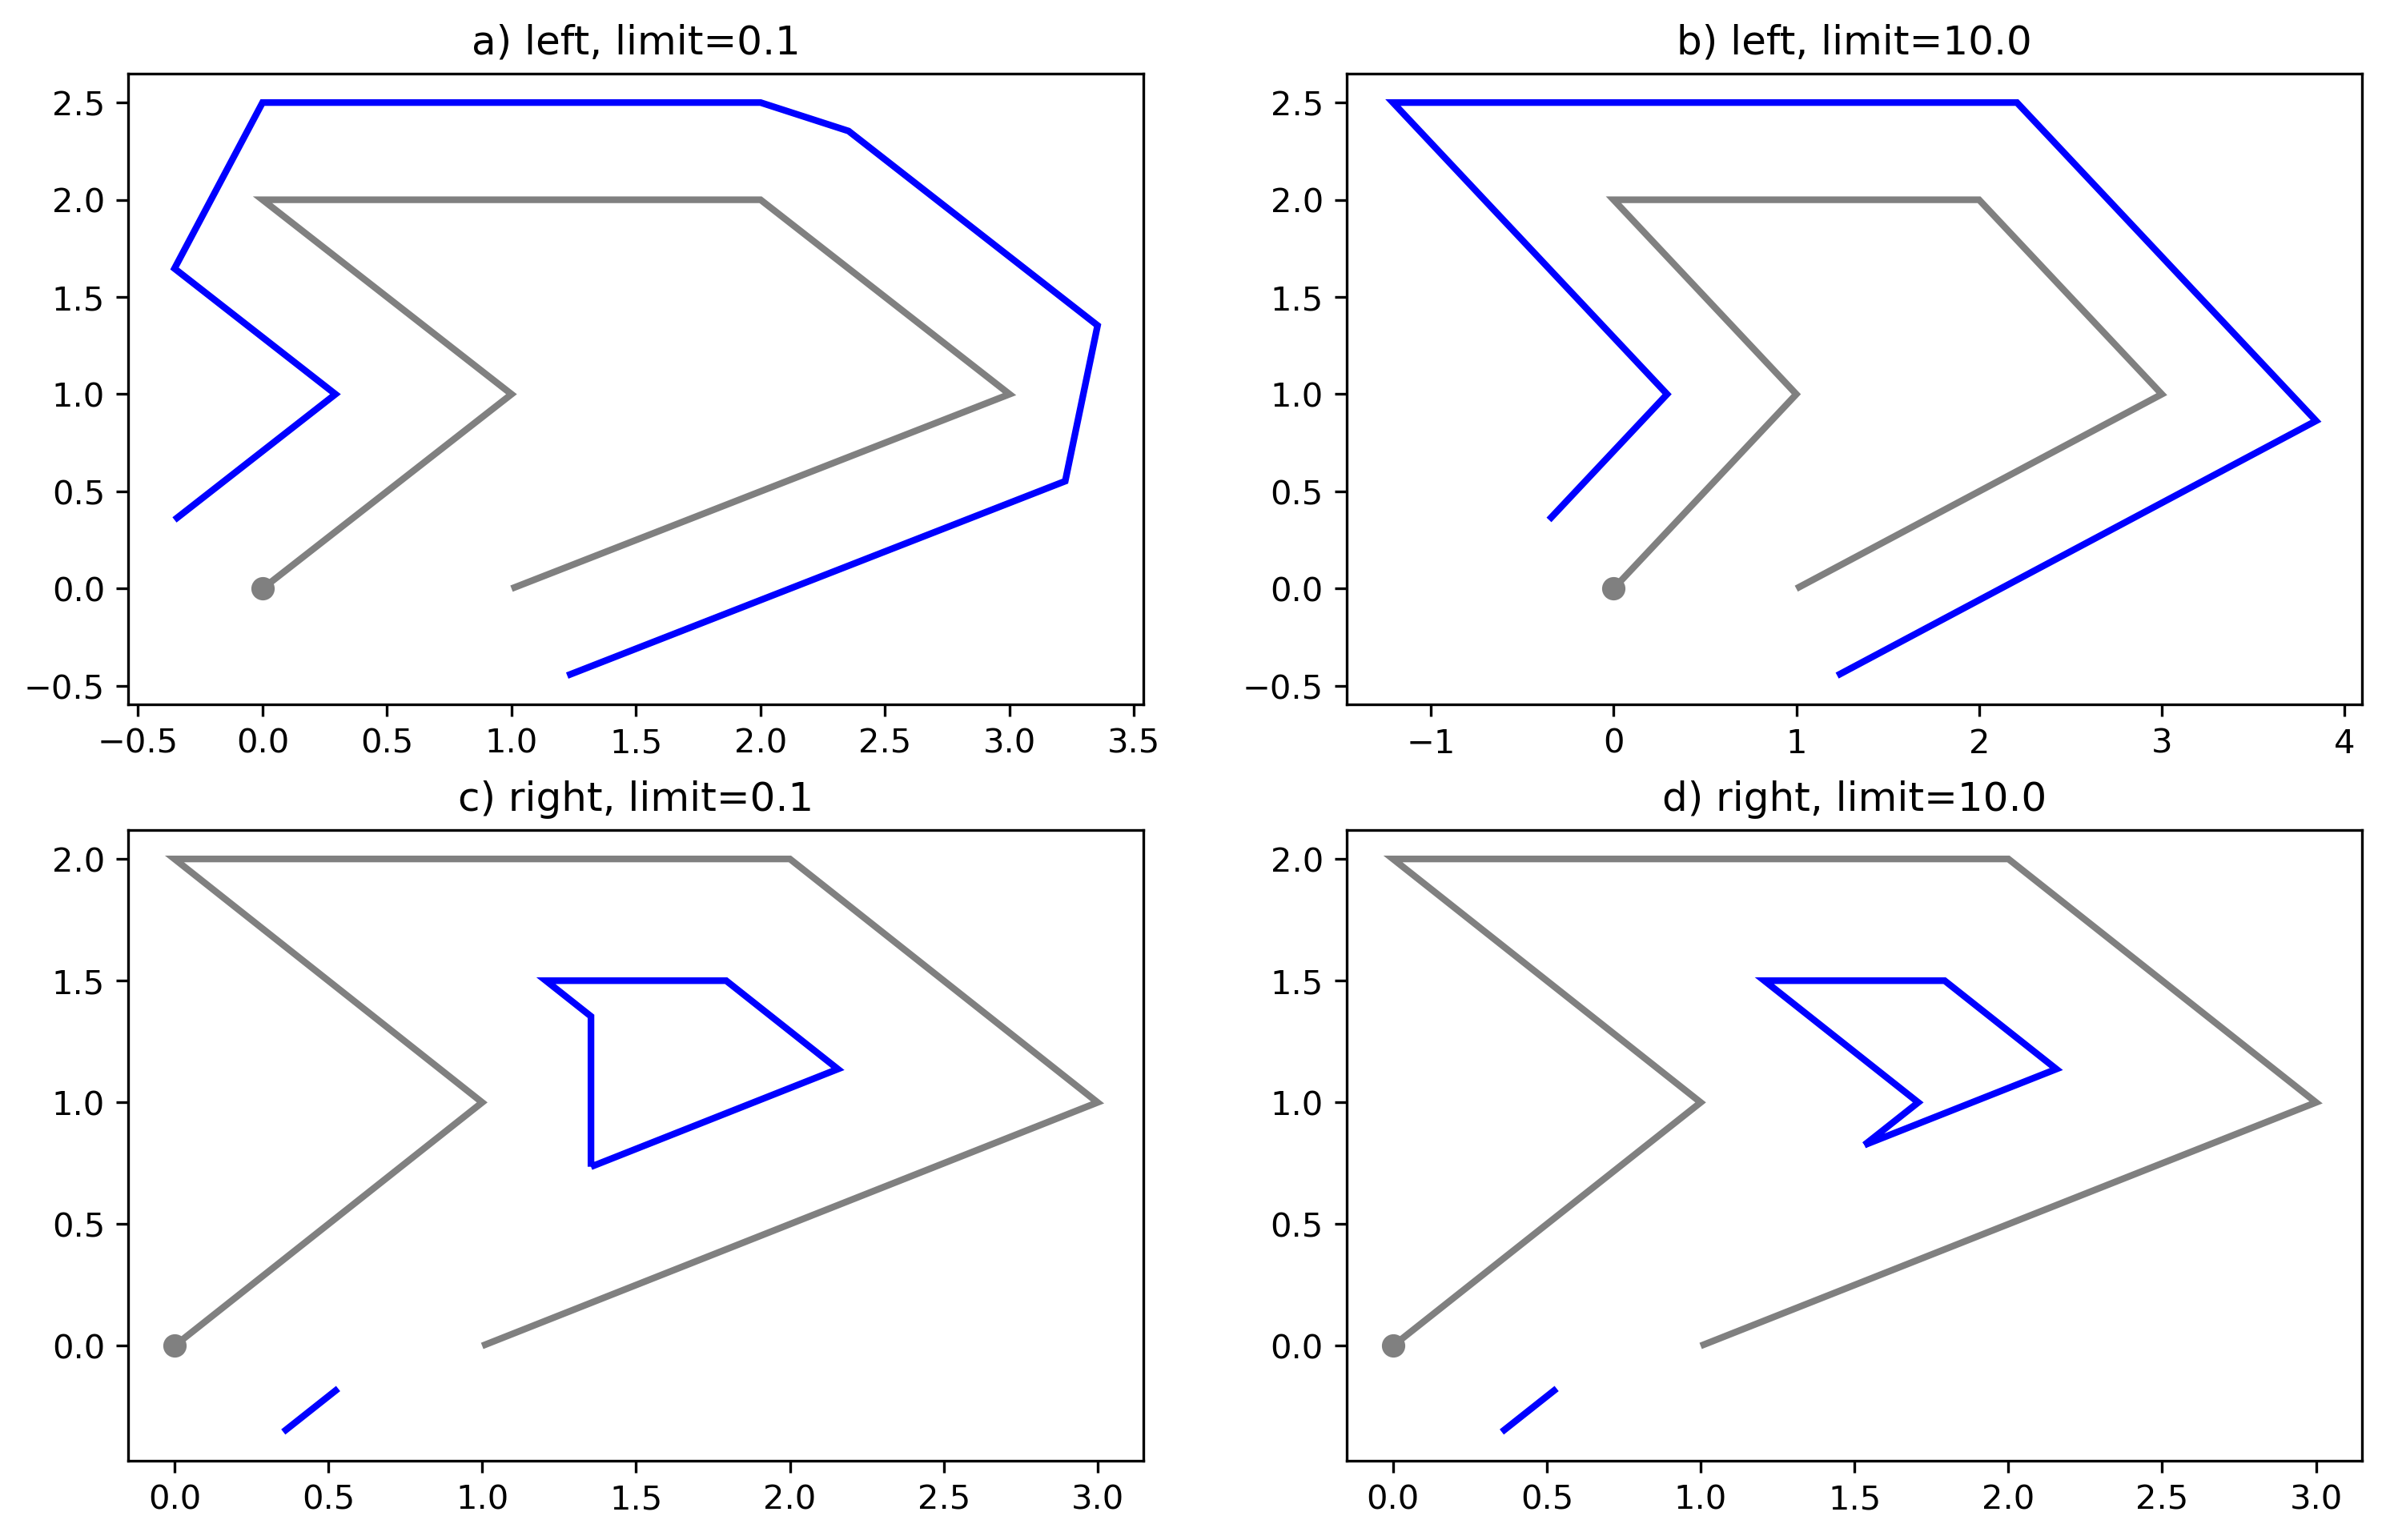

In [175]:
import matplotlib.pyplot as plt
from shapely import LineString, get_point
from shapely.plotting import plot_line, plot_points


line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line_bounds = line.bounds
ax_range = [int(line_bounds[0] - 1.0), int(line_bounds[2] + 1.0)]
ay_range = [int(line_bounds[1] - 1.0), int(line_bounds[3] + 1.0)]

fig = plt.figure(1, figsize=(SIZE[0], 1.5 * SIZE[1]), dpi=300)

# 1
ax = fig.add_subplot(221)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'left', join_style=2, mitre_limit=0.1)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('a) left, limit=0.1')


#2
ax = fig.add_subplot(222)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('b) left, limit=10.0')


#3
ax = fig.add_subplot(223)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'right', join_style=2, mitre_limit=0.1)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('c) right, limit=0.1')


#4
ax = fig.add_subplot(224)

plot_line(line, ax, add_points=False, color=GRAY)
plot_points(get_point(line, 0), ax=ax, color=GRAY)
offset = line.parallel_offset(0.5, 'right', join_style=2, mitre_limit=10.0)
plot_line(offset, ax=ax, add_points=False, color=BLUE)

ax.set_title('d) right, limit=10.0')


plt.show()


**object.simplify(tolerance, preserve_topology=True)**

Returns a simplified representation of the geometric object.

In [176]:
p = Point(0.0, 0.0)
x = p.buffer(1.0)
x.area

3.1365484905459398

In [177]:
len(x.exterior.coords)

65

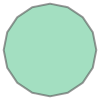

In [178]:
s = x.simplify(0.05, preserve_topology=False)
s

In [179]:
s.area

3.061467458920719

In [180]:
len(s.exterior.coords)

17

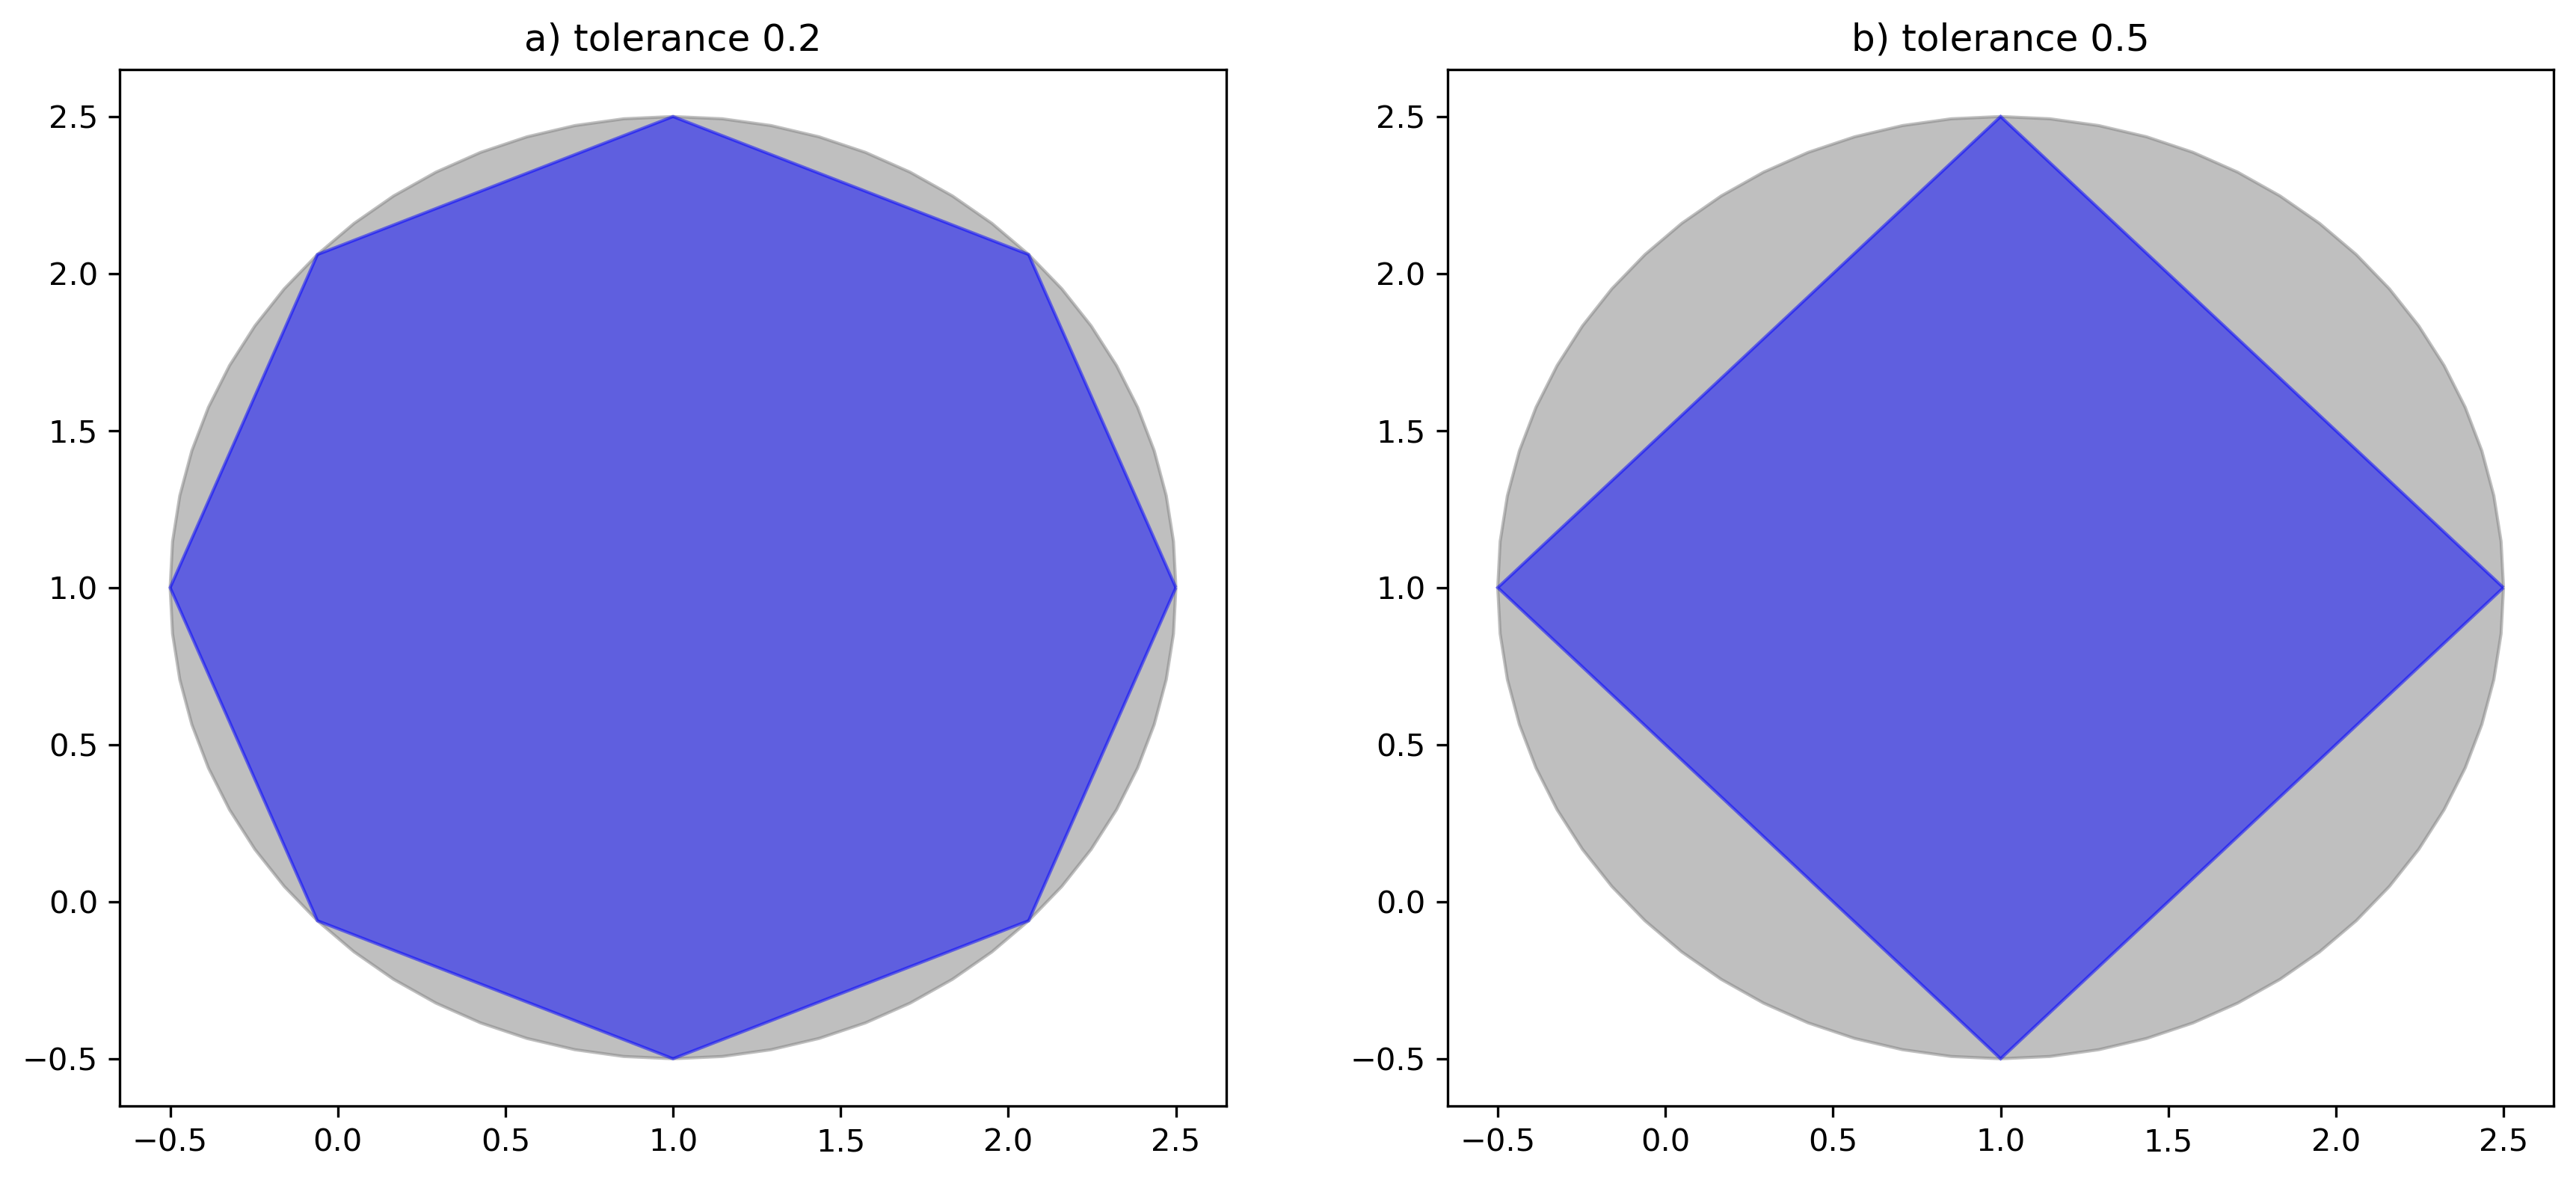

In [182]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint, Point
from shapely.plotting import plot_polygon

SIZE = (14, 6)

fig = plt.figure(1, figsize=SIZE, dpi=300)

p = Point(1, 1).buffer(1.5)

# 1
ax = fig.add_subplot(121)

q = p.simplify(0.2)

plot_polygon(p, ax=ax, add_points=False, color=GRAY, alpha=0.5)
plot_polygon(q, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('a) tolerance 0.2')


#2
ax = fig.add_subplot(122)

r = p.simplify(0.5)

plot_polygon(p, ax=ax, add_points=False, color=GRAY, alpha=0.5)
plot_polygon(r, ax=ax, add_points=False, color=BLUE, alpha=0.5)

ax.set_title('b) tolerance 0.5')

plt.show()
